<a href="https://colab.research.google.com/github/diegarza/Extraccion_De_Caracteristicas/blob/main/Actividad5_A01705984.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Actividad 5**

In [ ]:
# %pip install funpymodeling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [ ]:
df = pd.read_excel('microretailer_mit_lift_lab.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


#**Reemplazo de valores nulos**

In [ ]:
df.isnull().sum().sum()

9846

In [ ]:
columnas = list(df.columns)

In [ ]:
for columna in df[columnas]:
  if df[columna].isnull().sum() == 171:
    df = df.drop(columna, axis = 1)
  elif df[columna].isnull().sum() != 171:
    if df[columna].dtypes == 'object':
      df[columna] = df[columna].fillna('S/D')
    elif df[columna].dtypes == 'float64':
      df[columna] = df[columna].fillna(df[columna].mean())
    else:
      df[columna] = df[columna].fillna(method="ffill")
      df[columna] = df[columna].fillna(method="bfill")
  elif df[columna].isnull().sum() == 0:
    df[columna] = columna

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 102 entries, _record_id to 235_email
dtypes: float64(19), int64(2), object(81)
memory usage: 136.4+ KB


#**Valores atípicos**

In [ ]:
columnas = list(df.columns)

In [ ]:
# Ciclo for para encontrar outliers
for columna in df[columnas]:

  if (df[columna].dtypes == 'int64' or
      df[columna].dtypes == 'float64'):
      # Calcular cuartiles para eliminar outliers en cada columna
      Q1 = df[columna].quantile(0.25)
      Q3 = df[columna].quantile(0.75)

      # Calcular el IQR
      IQR = Q3 - Q1

      # Definir barreras para outliers
      lim_inf = Q1 - 1.5 * IQR
      lim_sup = Q3 + 1.5 * IQR

      # Máscara booleana para identificar outliers
      outlier_mask = (df[columna] < lim_inf) | (df[columna] > lim_sup)

      # Filtrar el df para obtener filas con outliers
      outliers_columna = df[outlier_mask]

      outlier_indices = df.index[outlier_mask].tolist()
      outlier_valores = df.loc[outlier_indices, columna].tolist()

      median = df[columna].median()
      df[columna][outlier_mask] = median

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 102 entries, _record_id to 235_email
dtypes: float64(19), int64(2), object(81)
memory usage: 136.4+ KB


#**Extracción de características**

In [ ]:
#Obtengo un análisis univariado de las variables categóricas
freq_tbl(df)

                               _record_id  frequency  percentage  \
0    dff2998e-af74-4de6-8efd-488aca24e67b          1    0.005848   
1    53c25f08-1c1b-4c1c-97d5-b45c940735cc          1    0.005848   
2    af5c48b5-a916-47a6-aacc-1128ea1e728e          1    0.005848   
3    4790411b-df1d-44f0-a659-6d99e26ae765          1    0.005848   
4    e70db20a-25db-412b-9a71-7df285c92a3d          1    0.005848   
..                                    ...        ...         ...   
166  75bcc709-90ff-4db7-bb82-293f2f72f3ae          1    0.005848   
167  bd59c8b6-81cb-4698-8cfd-dbab7f01ef21          1    0.005848   
168  94b1c6bc-1fb8-4895-aacc-c2604dc12b93          1    0.005848   
169  d9ff4194-657e-4fb4-b5f4-b7e8b350a646          1    0.005848   
170  bf720ff0-3b7d-47ed-ba49-f5d4bfb7293c          1    0.005848   

     cumulative_perc  
0           0.005848  
1           0.011696  
2           0.017544  
3           0.023392  
4           0.029240  
..               ...  
166         0.976608  

In [ ]:
columnas

##**1. _updated_by**

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(df['_updated_by'])
table1

_updated_by  frequency  percentage  cumulative_perc
0                Salomon Abdala Perez         20    0.116959         0.116959
1   Ángel Francisco Altamirano Campos         16    0.093567         0.210526
2                         José Zapata         14    0.081871         0.292398
3                        Emilio Garza         13    0.076023         0.368421
4                    Benjamin Barbosa         13    0.076023         0.444444
5                     Pedro Contreras         12    0.070175         0.514620
6                      Eduardo Zárate          9    0.052632         0.567251
7                    Alejandro Matias          8    0.046784         0.614035
8                     Harry Hernández          7    0.040936         0.654971
9                      Francisco Adán          7    0.040936         0.695906
10                      Hiram Jiménez          6    0.035088         0.730994
11                       Ismael López          6    0.035088         0.766082
12                      Mauro Munguía          4    0.023392         0.789474
13                         Alan Bravo          4    0.023392         0.812865
14                     Sandra Carreón          4    0.023392         0.836257
15                        Jorge Mason          3    0.017544         0.853801
16                      Jesús Herrera          3    0.017544         0.871345
17              Ricardo Galindo Bulos          3    0.017544         0.888889
18                         Yael Loeza          2    0.011696         0.900585
19                      Manuel Flores          2    0.011696         0.912281
20                       Juan Spínola          2    0.011696         0.923977
21                      Azael Mendoza          2    0.011696         0.935673
22             Irvin Vásquez Figueroa          2    0.011696         0.947368
23    Sebastian Salem Barranco Olvera          2    0.011696         0.959064
24      Jesús Antonio Zapatero García          1    0.005848         0.964912
25                   Marino Gutiérrez          1    0.005848         0.970760
26             Ramón Alberto Gastélum          1    0.005848         0.976608
27                        Saúl Cuervo          1    0.005848         0.982456
28                       José Oropeza          1    0.005848         0.988304
29                          Luis Lara          1    0.005848         0.994152
30                     Daniel Serrano          1    0.005848         1.000000

In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
filtro= table1[table1['frequency']>5]
filtro

_updated_by  frequency  percentage  cumulative_perc
0                Salomon Abdala Perez         20    0.116959         0.116959
1   Ángel Francisco Altamirano Campos         16    0.093567         0.210526
2                         José Zapata         14    0.081871         0.292398
3                        Emilio Garza         13    0.076023         0.368421
4                    Benjamin Barbosa         13    0.076023         0.444444
5                     Pedro Contreras         12    0.070175         0.514620
6                      Eduardo Zárate          9    0.052632         0.567251
7                    Alejandro Matias          8    0.046784         0.614035
8                     Harry Hernández          7    0.040936         0.654971
9                      Francisco Adán          7    0.040936         0.695906
10                      Hiram Jiménez          6    0.035088         0.730994
11                       Ismael López          6    0.035088         0.766082

In [ ]:
#Ajusto el indice de mi dataframe
filtro_index= filtro.set_index('_updated_by')
filtro_index

frequency  percentage  cumulative_perc
_updated_by                                                              
Salomon Abdala Perez                      20    0.116959         0.116959
Ángel Francisco Altamirano Campos         16    0.093567         0.210526
José Zapata                               14    0.081871         0.292398
Emilio Garza                              13    0.076023         0.368421
Benjamin Barbosa                          13    0.076023         0.444444
Pedro Contreras                           12    0.070175         0.514620
Eduardo Zárate                             9    0.052632         0.567251
Alejandro Matias                           8    0.046784         0.614035
Harry Hernández                            7    0.040936         0.654971
Francisco Adán                             7    0.040936         0.695906
Hiram Jiménez                              6    0.035088         0.730994
Ismael López                               6    0.035088         0.766082

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Salomon Abdala Perez'),
  Text(1, 0, 'Ángel Francisco Altamirano Campos'),
  Text(2, 0, 'José Zapata'),
  Text(3, 0, 'Emilio Garza'),
  Text(4, 0, 'Benjamin Barbosa'),
  Text(5, 0, 'Pedro Contreras'),
  Text(6, 0, 'Eduardo Zárate'),
  Text(7, 0, 'Alejandro Matias'),
  Text(8, 0, 'Harry Hernández'),
  Text(9, 0, 'Francisco Adán'),
  Text(10, 0, 'Hiram Jiménez'),
  Text(11, 0, 'Ismael López')])

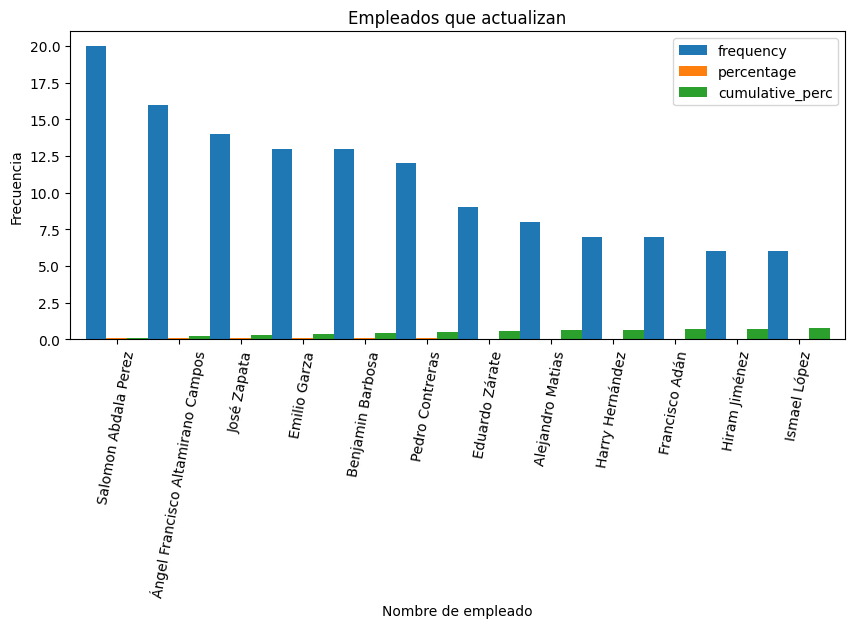

In [ ]:
# Realizamos grafico de barras del dataframe filtrado
filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Empleados que actualizan')
plt.xlabel('Nombre de empleado')
plt.ylabel('Frecuencia')
plt.xticks(rotation = 80)

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

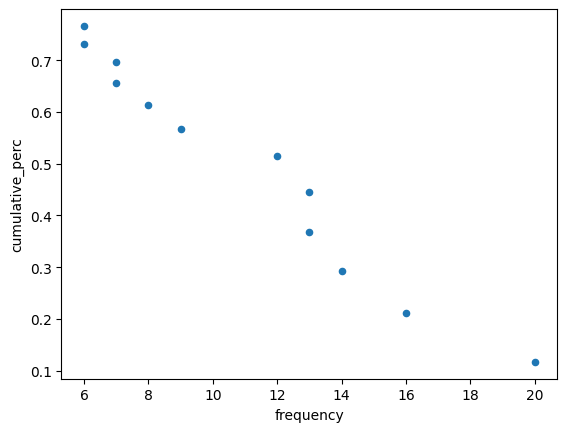

In [ ]:
#Realizamos grafico de dispersión del dataframe filtrado
filtro_index.plot("frequency", "cumulative_perc", kind="scatter")

<Axes: xlabel='_updated_by'>

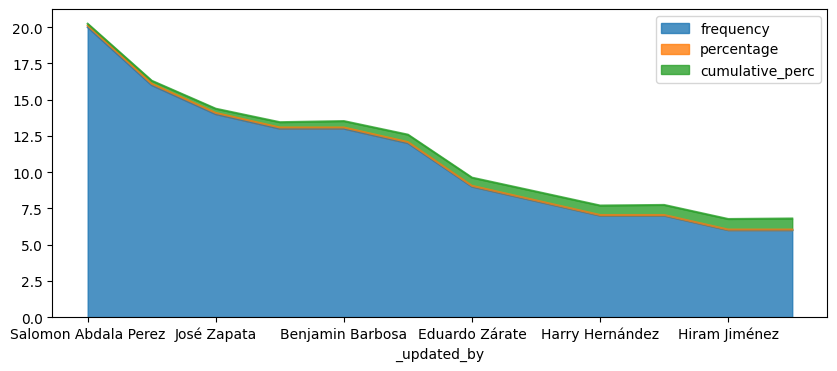

In [ ]:
#Realizamos grafico de área del dataframe filtrado
filtro_index.plot(kind='area', figsize=(10,4),alpha = 0.8)

<Axes: ylabel='frequency'>

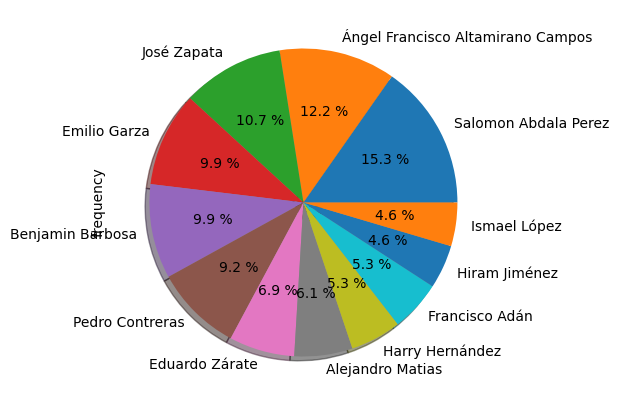

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

##**2. 264_technology_budget**

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(df['264_technology_budget'])
table1

264_technology_budget  frequency  percentage  cumulative_perc
0                             S/D        101    0.590643         0.590643
1        Totalmente en desacuerdo         30    0.175439         0.766082
2                      De acuerdo         15    0.087719         0.853801
3                   En desacuerdo          9    0.052632         0.906433
4           Totalmente de acuerdo          9    0.052632         0.959064
5  Ni de acuerdo ni en desacuerdo          7    0.040936         1.000000

In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
filtro= table1[table1['frequency']<101]
filtro

264_technology_budget  frequency  percentage  cumulative_perc
1        Totalmente en desacuerdo         30    0.175439         0.766082
2                      De acuerdo         15    0.087719         0.853801
3                   En desacuerdo          9    0.052632         0.906433
4           Totalmente de acuerdo          9    0.052632         0.959064
5  Ni de acuerdo ni en desacuerdo          7    0.040936         1.000000

In [ ]:
#Ajusto el indice de mi dataframe
filtro_index= filtro.set_index('264_technology_budget')
filtro_index

frequency  percentage  cumulative_perc
264_technology_budget                                                 
Totalmente en desacuerdo               30    0.175439         0.766082
De acuerdo                             15    0.087719         0.853801
En desacuerdo                           9    0.052632         0.906433
Totalmente de acuerdo                   9    0.052632         0.959064
Ni de acuerdo ni en desacuerdo          7    0.040936         1.000000

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Totalmente en desacuerdo'),
  Text(1, 0, 'De acuerdo'),
  Text(2, 0, 'En desacuerdo'),
  Text(3, 0, 'Totalmente de acuerdo'),
  Text(4, 0, 'Ni de acuerdo ni en desacuerdo')])

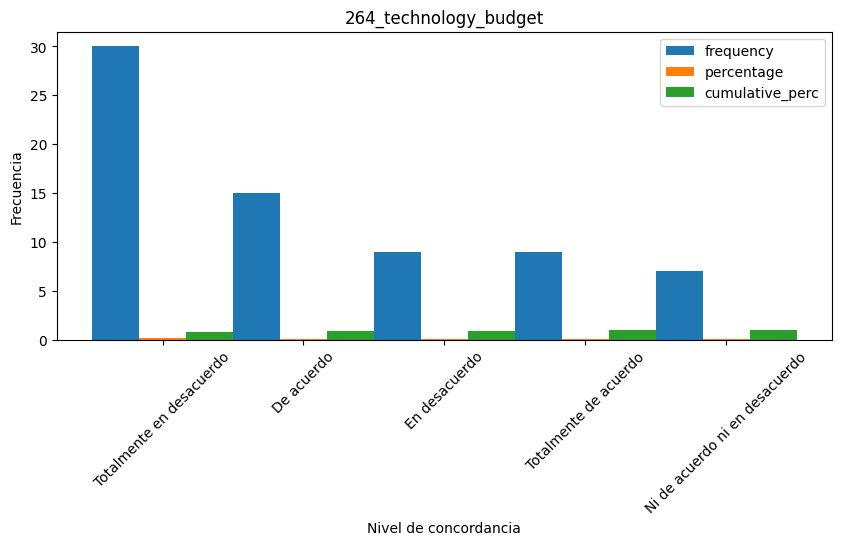

In [ ]:
# Realizamos grafico de barras del dataframe filtrado
filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('264_technology_budget')
plt.xlabel('Nivel de concordancia')
plt.ylabel('Frecuencia')
plt.xticks(rotation = 45)

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

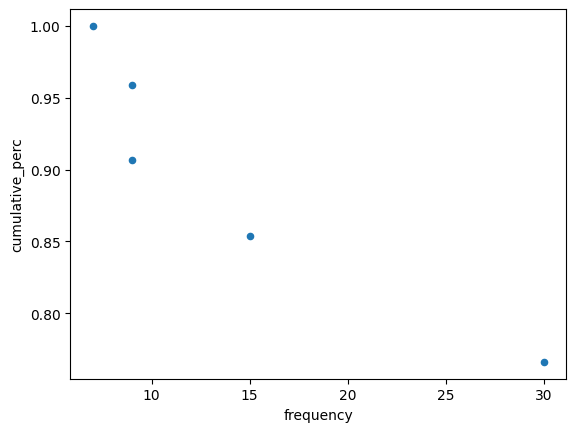

In [ ]:
#Realizamos grafico de dispersión del dataframe filtrado
filtro_index.plot("frequency", "cumulative_perc", kind="scatter")

<Axes: xlabel='264_technology_budget'>

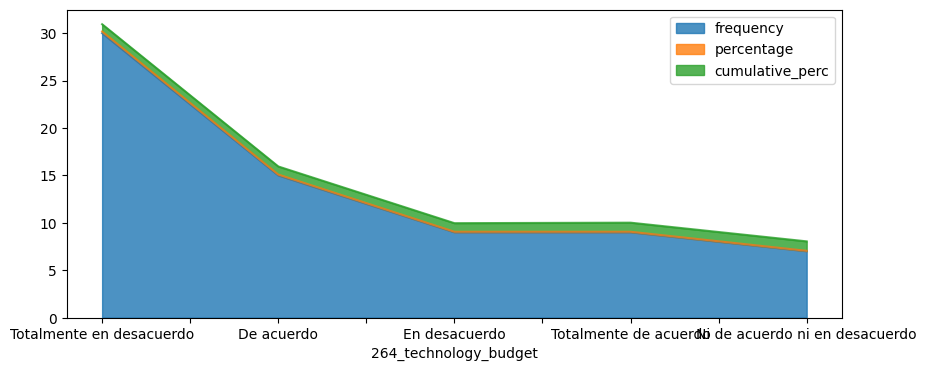

In [ ]:
#Realizamos grafico de área del dataframe filtrado
filtro_index.plot(kind='area', figsize=(10,4),alpha = 0.8)

<Axes: ylabel='frequency'>

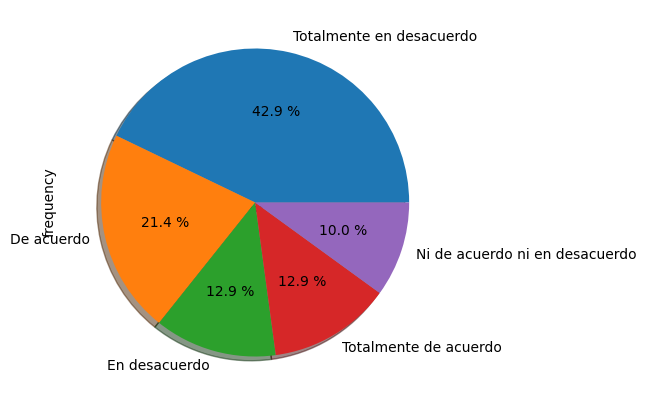

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

##**3. _title**

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(df['_title'])
table1

_title  frequency  percentage  cumulative_perc
0   November 9, 2022         73    0.426901         0.426901
1  November 10, 2022         26    0.152047         0.578947
2   November 7, 2022         20    0.116959         0.695906
3   November 3, 2022         16    0.093567         0.789474
4  November 12, 2022         15    0.087719         0.877193
5   November 8, 2022         10    0.058480         0.935673
6   November 4, 2022          9    0.052632         0.988304
7  November 11, 2022          1    0.005848         0.994152
8   November 2, 2022          1    0.005848         1.000000

In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
filtro= table1[table1['frequency']>8]
filtro

_title  frequency  percentage  cumulative_perc
0   November 9, 2022         73    0.426901         0.426901
1  November 10, 2022         26    0.152047         0.578947
2   November 7, 2022         20    0.116959         0.695906
3   November 3, 2022         16    0.093567         0.789474
4  November 12, 2022         15    0.087719         0.877193
5   November 8, 2022         10    0.058480         0.935673
6   November 4, 2022          9    0.052632         0.988304

In [ ]:
#Ajusto el indice de mi dataframe
filtro_index= filtro.set_index('_title')
filtro_index

frequency  percentage  cumulative_perc
_title                                                   
November 9, 2022          73    0.426901         0.426901
November 10, 2022         26    0.152047         0.578947
November 7, 2022          20    0.116959         0.695906
November 3, 2022          16    0.093567         0.789474
November 12, 2022         15    0.087719         0.877193
November 8, 2022          10    0.058480         0.935673
November 4, 2022           9    0.052632         0.988304

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'November 9, 2022'),
  Text(1, 0, 'November 10, 2022'),
  Text(2, 0, 'November 7, 2022'),
  Text(3, 0, 'November 3, 2022'),
  Text(4, 0, 'November 12, 2022'),
  Text(5, 0, 'November 8, 2022'),
  Text(6, 0, 'November 4, 2022')])

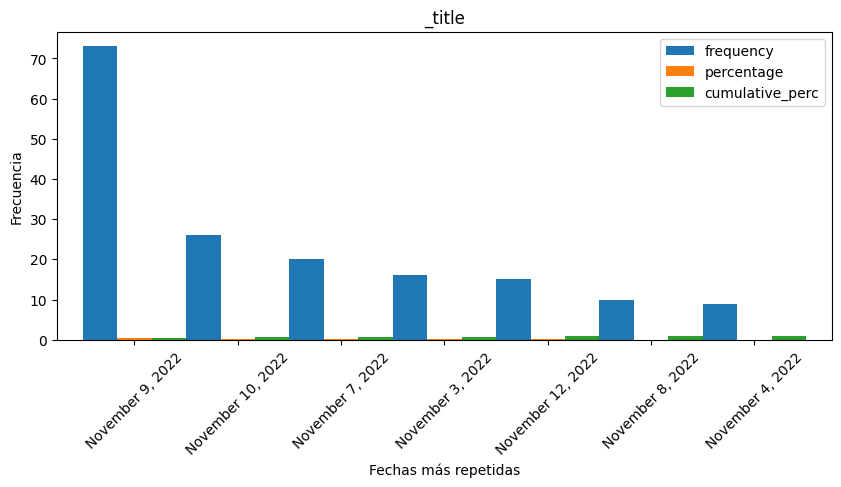

In [ ]:
# Realizamos grafico de barras del dataframe filtrado
filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('_title')
plt.xlabel('Fechas más repetidas')
plt.ylabel('Frecuencia')
plt.xticks(rotation = 45)

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

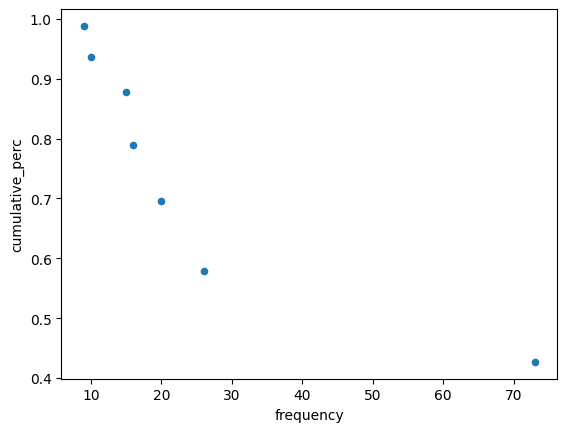

In [ ]:
#Realizamos grafico de dispersión del dataframe filtrado
filtro_index.plot("frequency", "cumulative_perc", kind="scatter")

<Axes: xlabel='_title'>

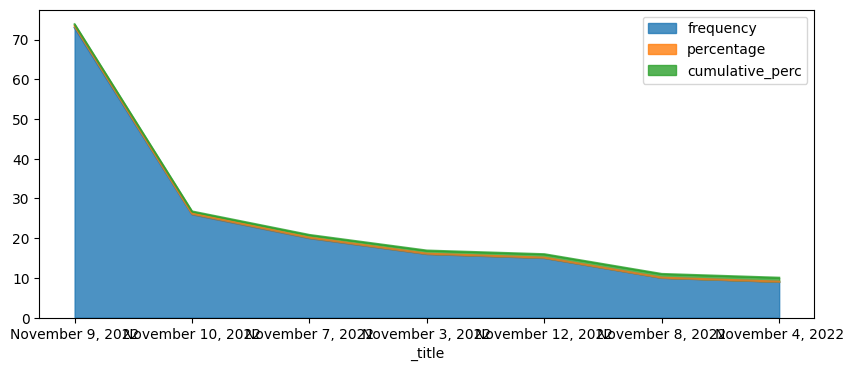

In [ ]:
#Realizamos grafico de área del dataframe filtrado
filtro_index.plot(kind='area', figsize=(10,4),alpha = 0.8)

<Axes: ylabel='frequency'>

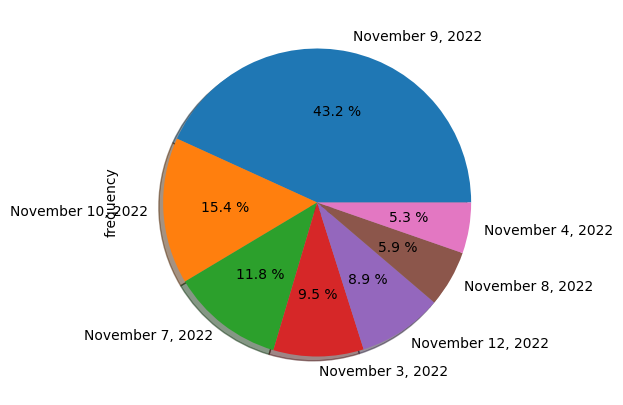

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

##**4. 234_willingness_participate_workshop**

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(df['234_willingness_participate_workshop'])
table1

234_willingness_participate_workshop  frequency  percentage  cumulative_perc
0                                  S/D         73    0.426901         0.426901
1                                   no         49    0.286550         0.713450
2                                  yes         49    0.286550         1.000000

In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
filtro= table1[table1['frequency']<73]
filtro

234_willingness_participate_workshop  frequency  percentage  cumulative_perc
1                                   no         49     0.28655          0.71345
2                                  yes         49     0.28655          1.00000

In [ ]:
#Ajusto el indice de mi dataframe
filtro_index= filtro.set_index('234_willingness_participate_workshop')
filtro_index

frequency  percentage  cumulative_perc
234_willingness_participate_workshop                                        
no                                           49     0.28655          0.71345
yes                                          49     0.28655          1.00000

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

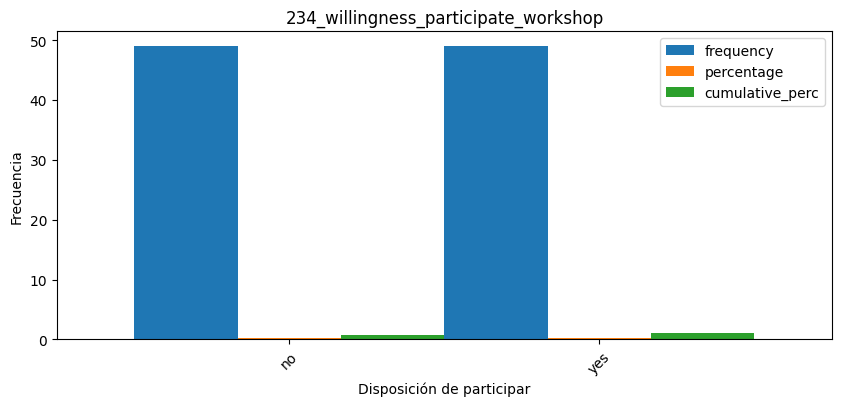

In [ ]:
# Realizamos grafico de barras del dataframe filtrado
filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('234_willingness_participate_workshop')
plt.xlabel('Disposición de participar')
plt.ylabel('Frecuencia')
plt.xticks(rotation = 45)

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

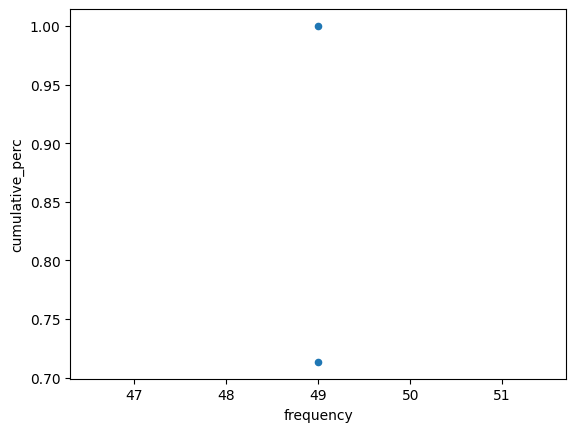

In [ ]:
#Realizamos grafico de dispersión del dataframe filtrado
filtro_index.plot("frequency", "cumulative_perc", kind="scatter")

<Axes: xlabel='234_willingness_participate_workshop'>

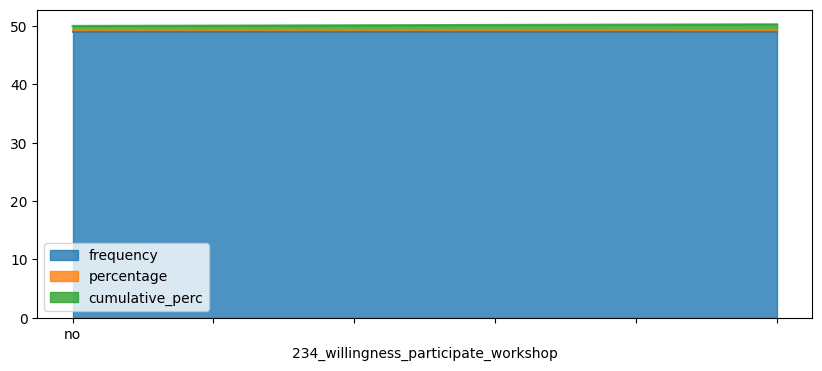

In [ ]:
#Realizamos grafico de área del dataframe filtrado
filtro_index.plot(kind='area', figsize=(10,4),alpha = 0.8)

<Axes: ylabel='frequency'>

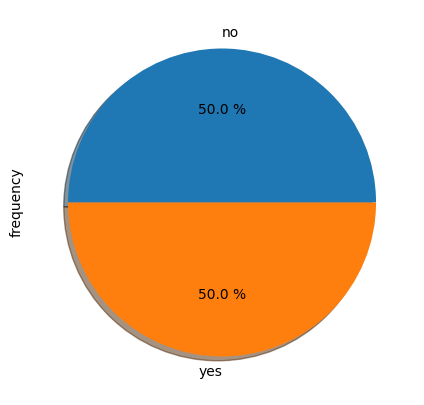

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

##**5. 263_technology_secure_sales**

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(df['263_technology_secure_sales'])
table1

263_technology_secure_sales  frequency  percentage  cumulative_perc
0                             S/D        101    0.590643         0.590643
1                      De acuerdo         29    0.169591         0.760234
2           Totalmente de acuerdo         14    0.081871         0.842105
3        Totalmente en desacuerdo         13    0.076023         0.918129
4  Ni de acuerdo ni en desacuerdo          8    0.046784         0.964912
5                   En desacuerdo          6    0.035088         1.000000

In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
filtro= table1[table1['frequency']<101]
filtro

263_technology_secure_sales  frequency  percentage  cumulative_perc
1                      De acuerdo         29    0.169591         0.760234
2           Totalmente de acuerdo         14    0.081871         0.842105
3        Totalmente en desacuerdo         13    0.076023         0.918129
4  Ni de acuerdo ni en desacuerdo          8    0.046784         0.964912
5                   En desacuerdo          6    0.035088         1.000000

In [ ]:
#Ajusto el indice de mi dataframe
filtro_index= filtro.set_index('263_technology_secure_sales')
filtro_index

frequency  percentage  cumulative_perc
263_technology_secure_sales                                           
De acuerdo                             29    0.169591         0.760234
Totalmente de acuerdo                  14    0.081871         0.842105
Totalmente en desacuerdo               13    0.076023         0.918129
Ni de acuerdo ni en desacuerdo          8    0.046784         0.964912
En desacuerdo                           6    0.035088         1.000000

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'De acuerdo'),
  Text(1, 0, 'Totalmente de acuerdo'),
  Text(2, 0, 'Totalmente en desacuerdo'),
  Text(3, 0, 'Ni de acuerdo ni en desacuerdo'),
  Text(4, 0, 'En desacuerdo')])

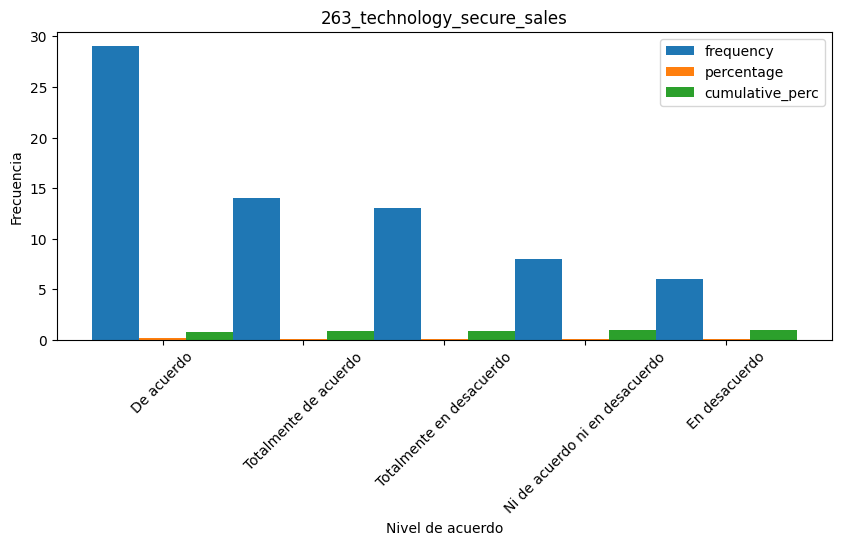

In [ ]:
# Realizamos grafico de barras del dataframe filtrado
filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('263_technology_secure_sales')
plt.xlabel('Nivel de acuerdo')
plt.ylabel('Frecuencia')
plt.xticks(rotation = 45)

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

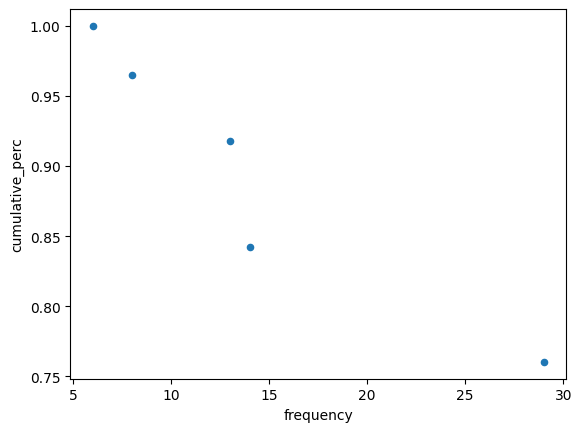

In [ ]:
#Realizamos grafico de dispersión del dataframe filtrado
filtro_index.plot("frequency", "cumulative_perc", kind="scatter")

<Axes: xlabel='263_technology_secure_sales'>

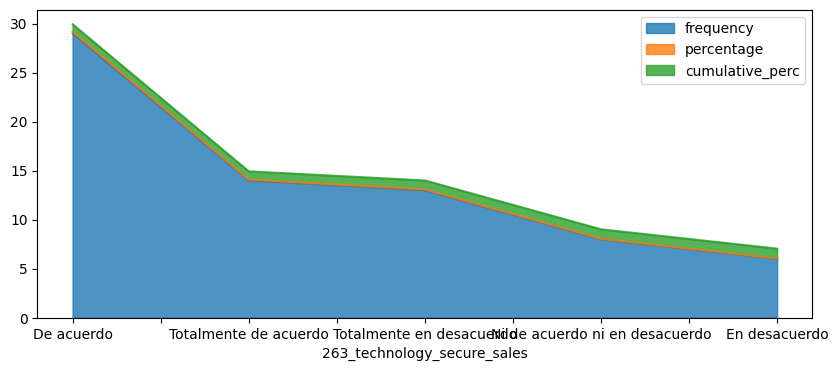

In [ ]:
#Realizamos grafico de área del dataframe filtrado
filtro_index.plot(kind='area', figsize=(10,4),alpha = 0.8)

<Axes: ylabel='frequency'>

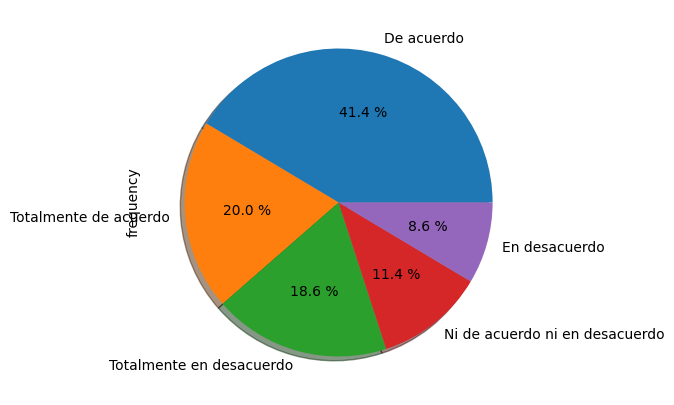

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

##**6. 262_technology_serve_customers**

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(df['262_technology_serve_customers'])
table1

262_technology_serve_customers  frequency  percentage  cumulative_perc
0                             S/D        100    0.584795         0.584795
1                      De acuerdo         25    0.146199         0.730994
2           Totalmente de acuerdo         20    0.116959         0.847953
3        Totalmente en desacuerdo         12    0.070175         0.918129
4  Ni de acuerdo ni en desacuerdo         11    0.064327         0.982456
5                   En desacuerdo          3    0.017544         1.000000

In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
filtro= table1[table1['frequency']<100]
filtro

262_technology_serve_customers  frequency  percentage  cumulative_perc
1                      De acuerdo         25    0.146199         0.730994
2           Totalmente de acuerdo         20    0.116959         0.847953
3        Totalmente en desacuerdo         12    0.070175         0.918129
4  Ni de acuerdo ni en desacuerdo         11    0.064327         0.982456
5                   En desacuerdo          3    0.017544         1.000000

In [ ]:
#Ajusto el indice de mi dataframe
filtro_index= filtro.set_index('262_technology_serve_customers')
filtro_index

frequency  percentage  cumulative_perc
262_technology_serve_customers                                        
De acuerdo                             25    0.146199         0.730994
Totalmente de acuerdo                  20    0.116959         0.847953
Totalmente en desacuerdo               12    0.070175         0.918129
Ni de acuerdo ni en desacuerdo         11    0.064327         0.982456
En desacuerdo                           3    0.017544         1.000000

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'De acuerdo'),
  Text(1, 0, 'Totalmente de acuerdo'),
  Text(2, 0, 'Totalmente en desacuerdo'),
  Text(3, 0, 'Ni de acuerdo ni en desacuerdo'),
  Text(4, 0, 'En desacuerdo')])

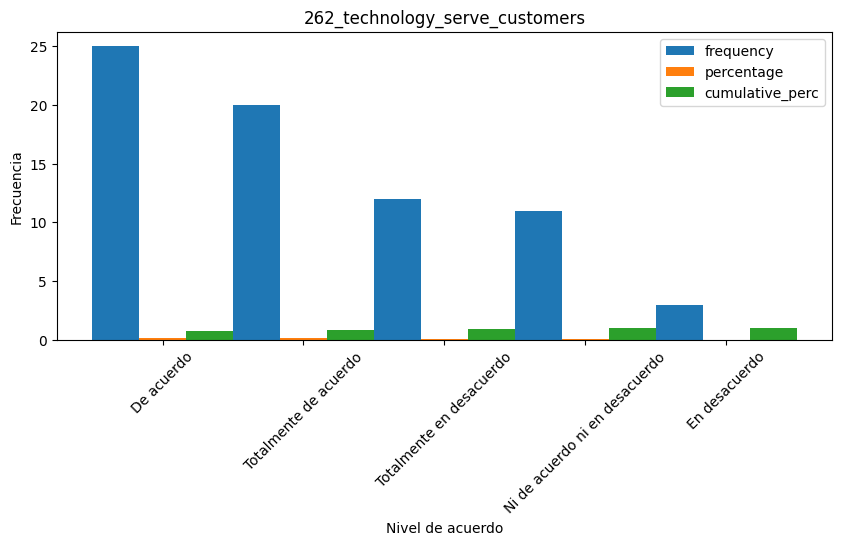

In [ ]:
# Realizamos grafico de barras del dataframe filtrado
filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('262_technology_serve_customers')
plt.xlabel('Nivel de acuerdo')
plt.ylabel('Frecuencia')
plt.xticks(rotation = 45)

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

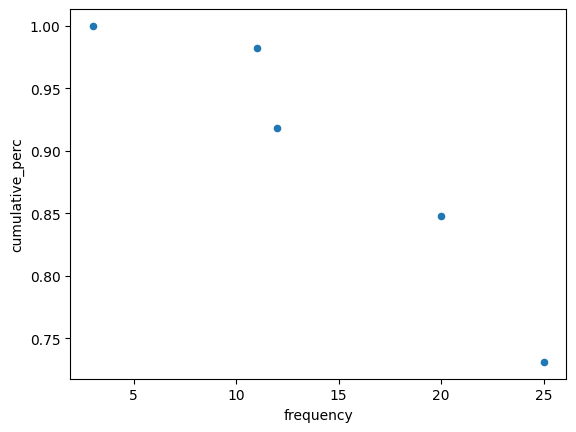

In [ ]:
#Realizamos grafico de dispersión del dataframe filtrado
filtro_index.plot("frequency", "cumulative_perc", kind="scatter")

<Axes: xlabel='262_technology_serve_customers'>

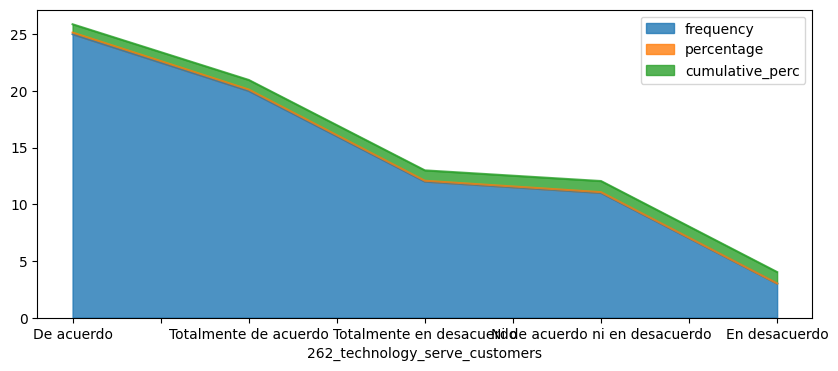

In [ ]:
#Realizamos grafico de área del dataframe filtrado
filtro_index.plot(kind='area', figsize=(10,4),alpha = 0.8)

<Axes: ylabel='frequency'>

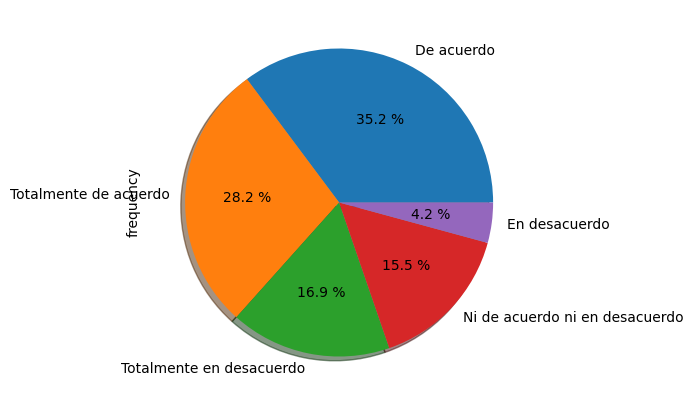

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

##**7. 261_technology_organization**

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(df['261_technology_organization'])
table1

261_technology_organization  frequency  percentage  cumulative_perc
0                             S/D        102    0.596491         0.596491
1           Totalmente de acuerdo         28    0.163743         0.760234
2                      De acuerdo         25    0.146199         0.906433
3        Totalmente en desacuerdo          9    0.052632         0.959064
4  Ni de acuerdo ni en desacuerdo          5    0.029240         0.988304
5                   En desacuerdo          2    0.011696         1.000000

In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
filtro= table1[table1['frequency']<102]
filtro

261_technology_organization  frequency  percentage  cumulative_perc
1           Totalmente de acuerdo         28    0.163743         0.760234
2                      De acuerdo         25    0.146199         0.906433
3        Totalmente en desacuerdo          9    0.052632         0.959064
4  Ni de acuerdo ni en desacuerdo          5    0.029240         0.988304
5                   En desacuerdo          2    0.011696         1.000000

In [ ]:
#Ajusto el indice de mi dataframe
filtro_index= filtro.set_index('261_technology_organization')
filtro_index

frequency  percentage  cumulative_perc
261_technology_organization                                           
Totalmente de acuerdo                  28    0.163743         0.760234
De acuerdo                             25    0.146199         0.906433
Totalmente en desacuerdo                9    0.052632         0.959064
Ni de acuerdo ni en desacuerdo          5    0.029240         0.988304
En desacuerdo                           2    0.011696         1.000000

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Totalmente de acuerdo'),
  Text(1, 0, 'De acuerdo'),
  Text(2, 0, 'Totalmente en desacuerdo'),
  Text(3, 0, 'Ni de acuerdo ni en desacuerdo'),
  Text(4, 0, 'En desacuerdo')])

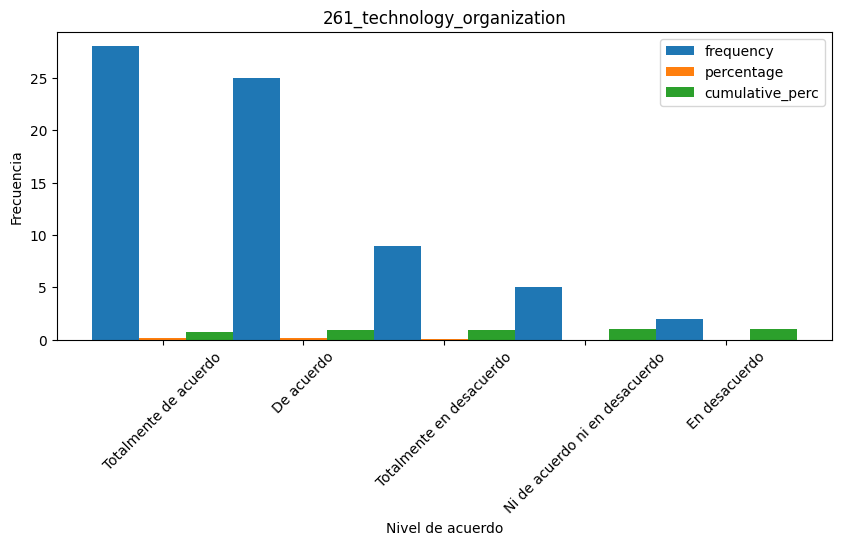

In [ ]:
# Realizamos grafico de barras del dataframe filtrado
filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('261_technology_organization')
plt.xlabel('Nivel de acuerdo')
plt.ylabel('Frecuencia')
plt.xticks(rotation = 45)

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

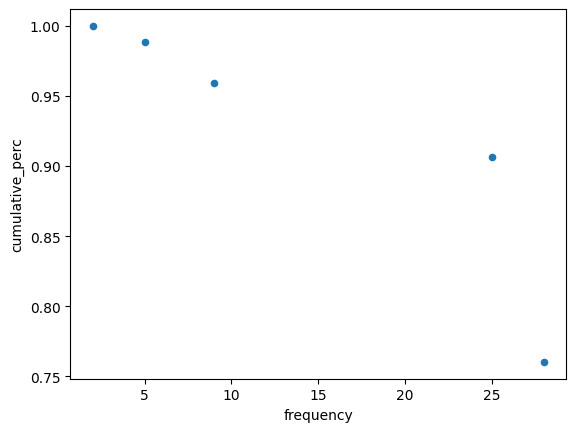

In [ ]:
#Realizamos grafico de dispersión del dataframe filtrado
filtro_index.plot("frequency", "cumulative_perc", kind="scatter")

<Axes: xlabel='261_technology_organization'>

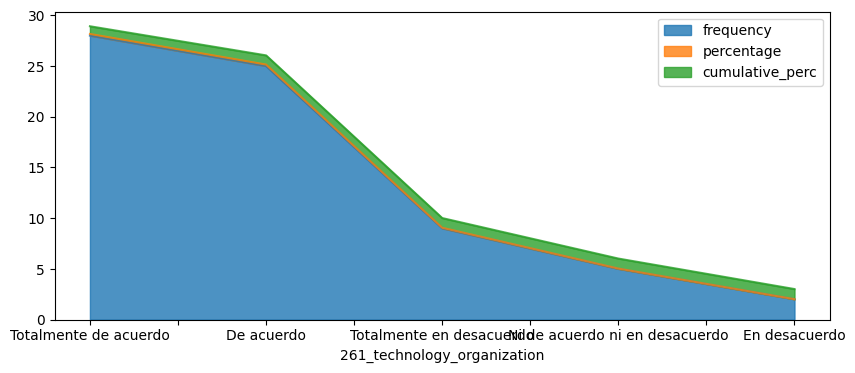

In [ ]:
#Realizamos grafico de área del dataframe filtrado
filtro_index.plot(kind='area', figsize=(10,4),alpha = 0.8)

<Axes: ylabel='frequency'>

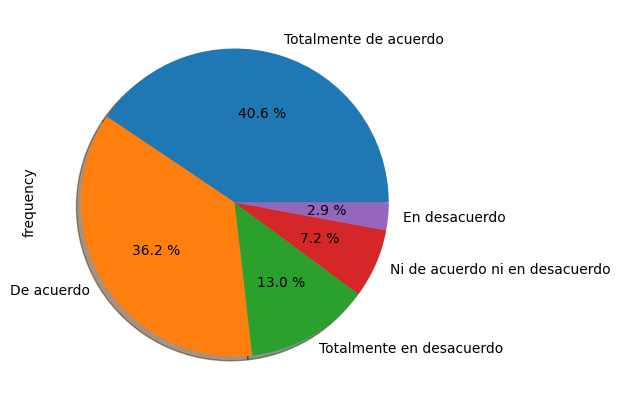

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

##**8. 260_technology_scalable**

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(df['260_technology_scalable'])
table1

260_technology_scalable  frequency  percentage  cumulative_perc
0                             S/D        102    0.596491         0.596491
1           Totalmente de acuerdo         35    0.204678         0.801170
2                      De acuerdo         14    0.081871         0.883041
3  Ni de acuerdo ni en desacuerdo          8    0.046784         0.929825
4                   En desacuerdo          6    0.035088         0.964912
5        Totalmente en desacuerdo          6    0.035088         1.000000

In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
filtro= table1[table1['frequency']<102]
filtro

260_technology_scalable  frequency  percentage  cumulative_perc
1           Totalmente de acuerdo         35    0.204678         0.801170
2                      De acuerdo         14    0.081871         0.883041
3  Ni de acuerdo ni en desacuerdo          8    0.046784         0.929825
4                   En desacuerdo          6    0.035088         0.964912
5        Totalmente en desacuerdo          6    0.035088         1.000000

In [ ]:
#Ajusto el indice de mi dataframe
filtro_index= filtro.set_index('260_technology_scalable')
filtro_index

frequency  percentage  cumulative_perc
260_technology_scalable                                               
Totalmente de acuerdo                  35    0.204678         0.801170
De acuerdo                             14    0.081871         0.883041
Ni de acuerdo ni en desacuerdo          8    0.046784         0.929825
En desacuerdo                           6    0.035088         0.964912
Totalmente en desacuerdo                6    0.035088         1.000000

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Totalmente de acuerdo'),
  Text(1, 0, 'De acuerdo'),
  Text(2, 0, 'Ni de acuerdo ni en desacuerdo'),
  Text(3, 0, 'En desacuerdo'),
  Text(4, 0, 'Totalmente en desacuerdo')])

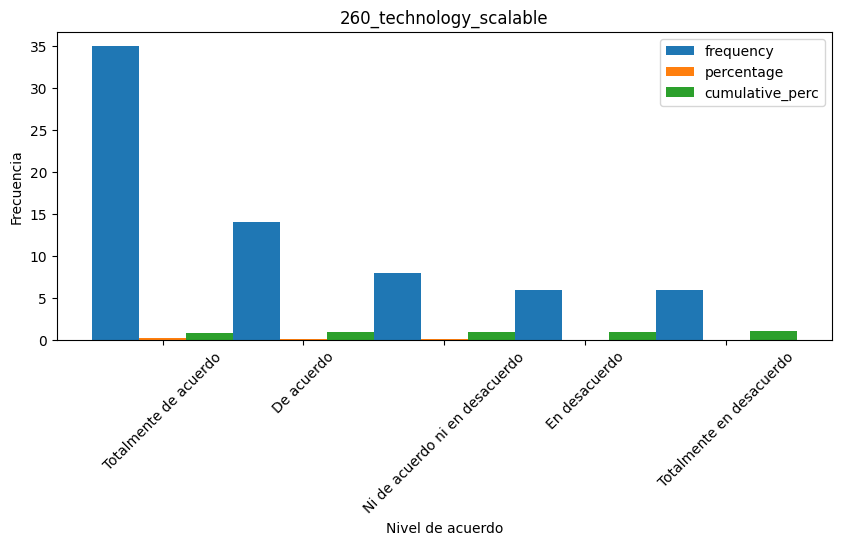

In [ ]:
# Realizamos grafico de barras del dataframe filtrado
filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('260_technology_scalable')
plt.xlabel('Nivel de acuerdo')
plt.ylabel('Frecuencia')
plt.xticks(rotation = 45)

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

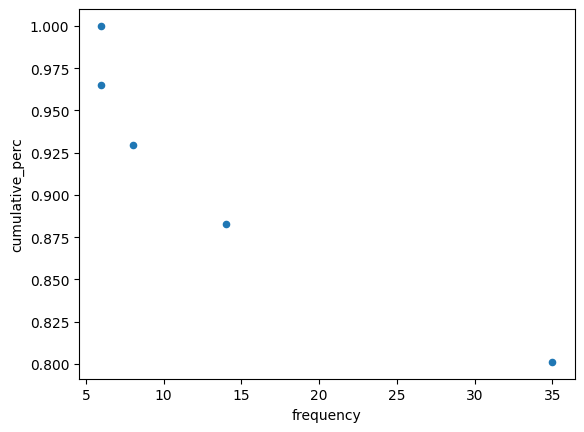

In [ ]:
#Realizamos grafico de dispersión del dataframe filtrado
filtro_index.plot("frequency", "cumulative_perc", kind="scatter")

<Axes: xlabel='260_technology_scalable'>

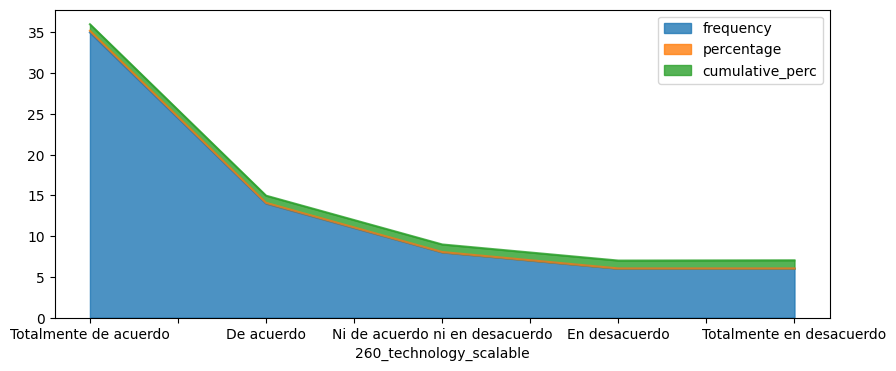

In [ ]:
#Realizamos grafico de área del dataframe filtrado
filtro_index.plot(kind='area', figsize=(10,4),alpha = 0.8)

<Axes: ylabel='frequency'>

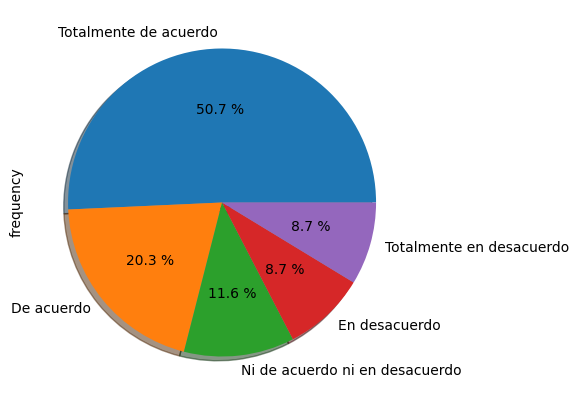

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

##**9. 254_technology_roadmap**

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(df['254_technology_roadmap'])
table1

254_technology_roadmap  frequency  percentage  cumulative_perc
0                             S/D        100    0.584795         0.584795
1        Totalmente en desacuerdo         32    0.187135         0.771930
2           Totalmente de acuerdo         12    0.070175         0.842105
3                      De acuerdo         11    0.064327         0.906433
4  Ni de acuerdo ni en desacuerdo          9    0.052632         0.959064
5                   En desacuerdo          7    0.040936         1.000000

In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
filtro= table1[table1['frequency']<100]
filtro

254_technology_roadmap  frequency  percentage  cumulative_perc
1        Totalmente en desacuerdo         32    0.187135         0.771930
2           Totalmente de acuerdo         12    0.070175         0.842105
3                      De acuerdo         11    0.064327         0.906433
4  Ni de acuerdo ni en desacuerdo          9    0.052632         0.959064
5                   En desacuerdo          7    0.040936         1.000000

In [ ]:
#Ajusto el indice de mi dataframe
filtro_index= filtro.set_index('254_technology_roadmap')
filtro_index

frequency  percentage  cumulative_perc
254_technology_roadmap                                                
Totalmente en desacuerdo               32    0.187135         0.771930
Totalmente de acuerdo                  12    0.070175         0.842105
De acuerdo                             11    0.064327         0.906433
Ni de acuerdo ni en desacuerdo          9    0.052632         0.959064
En desacuerdo                           7    0.040936         1.000000

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Totalmente en desacuerdo'),
  Text(1, 0, 'Totalmente de acuerdo'),
  Text(2, 0, 'De acuerdo'),
  Text(3, 0, 'Ni de acuerdo ni en desacuerdo'),
  Text(4, 0, 'En desacuerdo')])

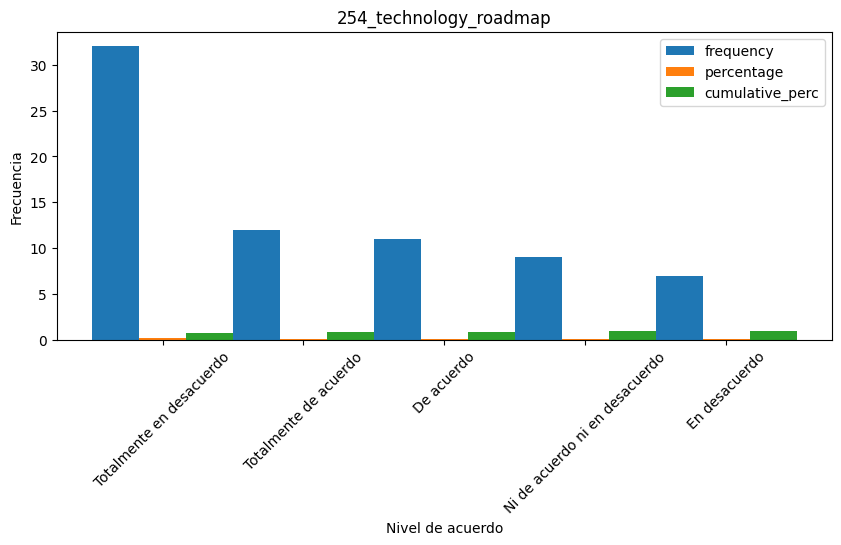

In [ ]:
# Realizamos grafico de barras del dataframe filtrado
filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('254_technology_roadmap')
plt.xlabel('Nivel de acuerdo')
plt.ylabel('Frecuencia')
plt.xticks(rotation = 45)

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

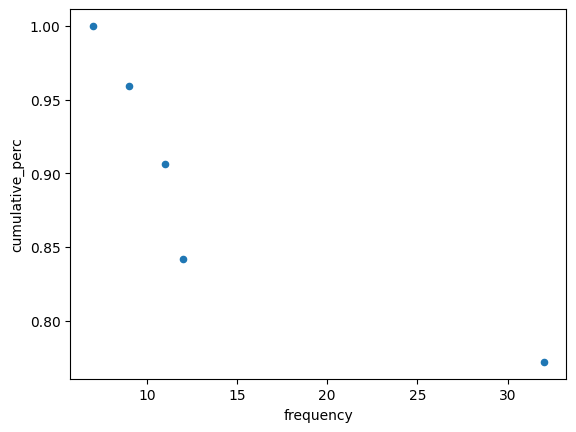

In [ ]:
#Realizamos grafico de dispersión del dataframe filtrado
filtro_index.plot("frequency", "cumulative_perc", kind="scatter")

<Axes: xlabel='254_technology_roadmap'>

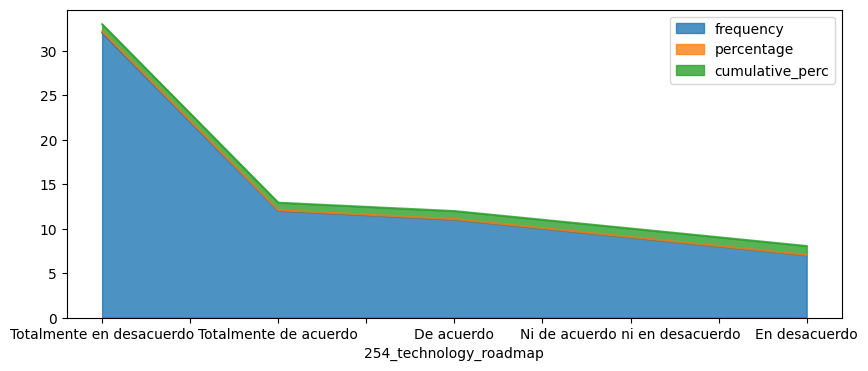

In [ ]:
#Realizamos grafico de área del dataframe filtrado
filtro_index.plot(kind='area', figsize=(10,4),alpha = 0.8)

<Axes: ylabel='frequency'>

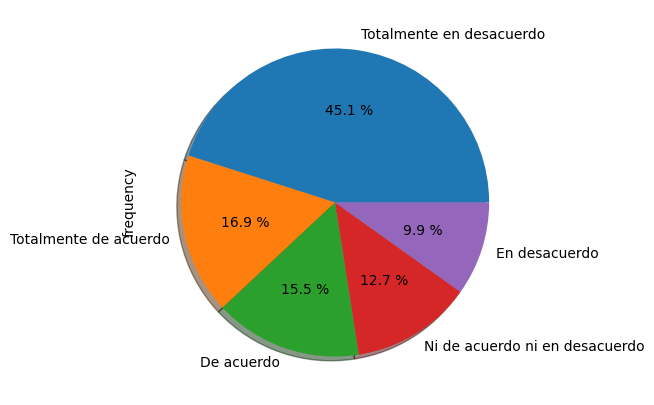

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

##**10. 251_technology_investment_customers**

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(df['251_technology_investment_customers'])
table1

251_technology_investment_customers  frequency  percentage  cumulative_perc
0                                 S/D         98    0.573099         0.573099
1               Totalmente de acuerdo         35    0.204678         0.777778
2                          De acuerdo         23    0.134503         0.912281
3            Totalmente en desacuerdo          7    0.040936         0.953216
4      Ni de acuerdo ni en desacuerdo          5    0.029240         0.982456
5                       En desacuerdo          3    0.017544         1.000000

In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
filtro= table1[table1['frequency']<98]
filtro

251_technology_investment_customers  frequency  percentage  cumulative_perc
1               Totalmente de acuerdo         35    0.204678         0.777778
2                          De acuerdo         23    0.134503         0.912281
3            Totalmente en desacuerdo          7    0.040936         0.953216
4      Ni de acuerdo ni en desacuerdo          5    0.029240         0.982456
5                       En desacuerdo          3    0.017544         1.000000

In [ ]:
#Ajusto el indice de mi dataframe
filtro_index= filtro.set_index('251_technology_investment_customers')
filtro_index

frequency  percentage  cumulative_perc
251_technology_investment_customers                                        
Totalmente de acuerdo                       35    0.204678         0.777778
De acuerdo                                  23    0.134503         0.912281
Totalmente en desacuerdo                     7    0.040936         0.953216
Ni de acuerdo ni en desacuerdo               5    0.029240         0.982456
En desacuerdo                                3    0.017544         1.000000

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Totalmente de acuerdo'),
  Text(1, 0, 'De acuerdo'),
  Text(2, 0, 'Totalmente en desacuerdo'),
  Text(3, 0, 'Ni de acuerdo ni en desacuerdo'),
  Text(4, 0, 'En desacuerdo')])

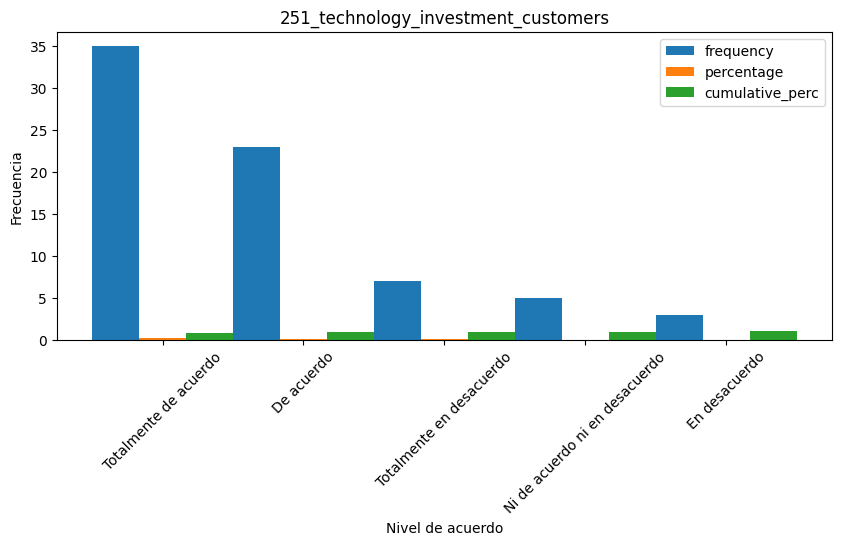

In [ ]:
# Realizamos grafico de barras del dataframe filtrado
filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('251_technology_investment_customers')
plt.xlabel('Nivel de acuerdo')
plt.ylabel('Frecuencia')
plt.xticks(rotation = 45)

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

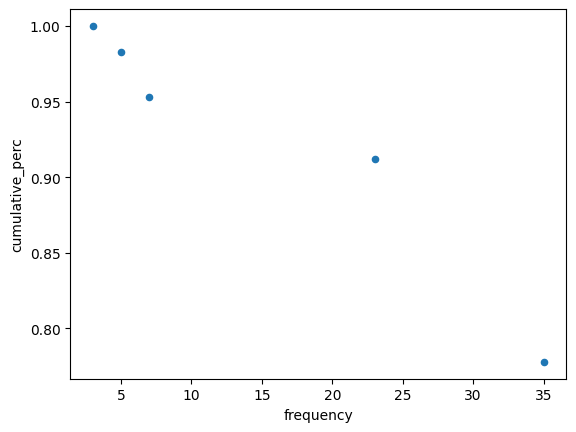

In [ ]:
#Realizamos grafico de dispersión del dataframe filtrado
filtro_index.plot("frequency", "cumulative_perc", kind="scatter")

<Axes: xlabel='251_technology_investment_customers'>

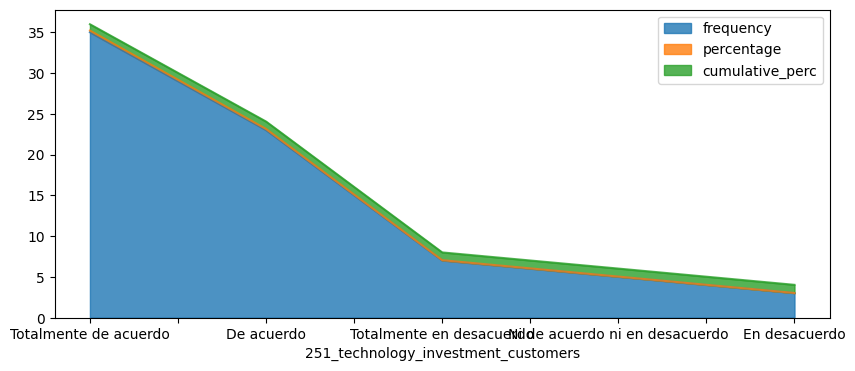

In [ ]:
#Realizamos grafico de área del dataframe filtrado
filtro_index.plot(kind='area', figsize=(10,4),alpha = 0.8)

<Axes: ylabel='frequency'>

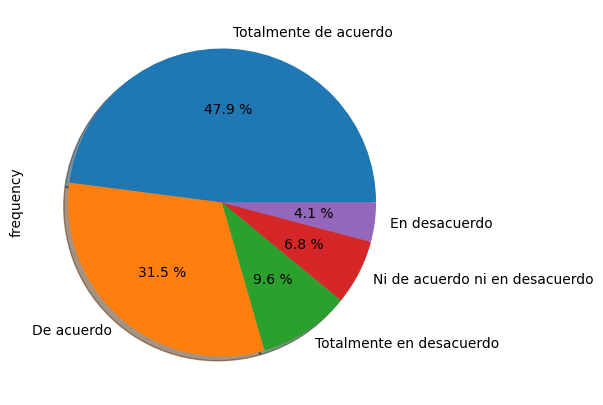

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

##**11. 250_technology_investment_operations**

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(df['250_technology_investment_operations'])
table1

250_technology_investment_operations  frequency  percentage  cumulative_perc
0                                  S/D         97    0.567251         0.567251
1                Totalmente de acuerdo         34    0.198830         0.766082
2                           De acuerdo         20    0.116959         0.883041
3             Totalmente en desacuerdo          8    0.046784         0.929825
4                        En desacuerdo          6    0.035088         0.964912
5       Ni de acuerdo ni en desacuerdo          6    0.035088         1.000000

In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
filtro= table1[table1['frequency']<97]
filtro

250_technology_investment_operations  frequency  percentage  cumulative_perc
1                Totalmente de acuerdo         34    0.198830         0.766082
2                           De acuerdo         20    0.116959         0.883041
3             Totalmente en desacuerdo          8    0.046784         0.929825
4                        En desacuerdo          6    0.035088         0.964912
5       Ni de acuerdo ni en desacuerdo          6    0.035088         1.000000

In [ ]:
#Ajusto el indice de mi dataframe
filtro_index= filtro.set_index('250_technology_investment_operations')
filtro_index

frequency  percentage  cumulative_perc
250_technology_investment_operations                                        
Totalmente de acuerdo                        34    0.198830         0.766082
De acuerdo                                   20    0.116959         0.883041
Totalmente en desacuerdo                      8    0.046784         0.929825
En desacuerdo                                 6    0.035088         0.964912
Ni de acuerdo ni en desacuerdo                6    0.035088         1.000000

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Totalmente de acuerdo'),
  Text(1, 0, 'De acuerdo'),
  Text(2, 0, 'Totalmente en desacuerdo'),
  Text(3, 0, 'En desacuerdo'),
  Text(4, 0, 'Ni de acuerdo ni en desacuerdo')])

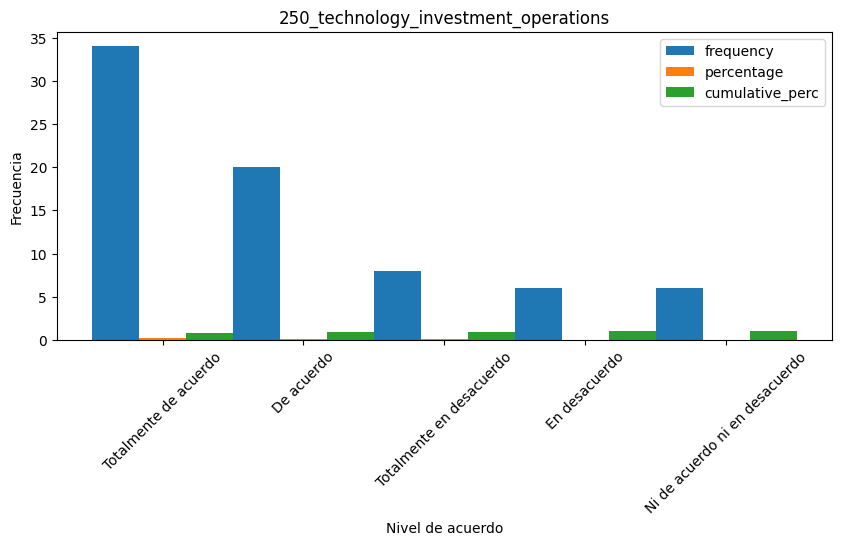

In [ ]:
# Realizamos grafico de barras del dataframe filtrado
filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('250_technology_investment_operations')
plt.xlabel('Nivel de acuerdo')
plt.ylabel('Frecuencia')
plt.xticks(rotation = 45)

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

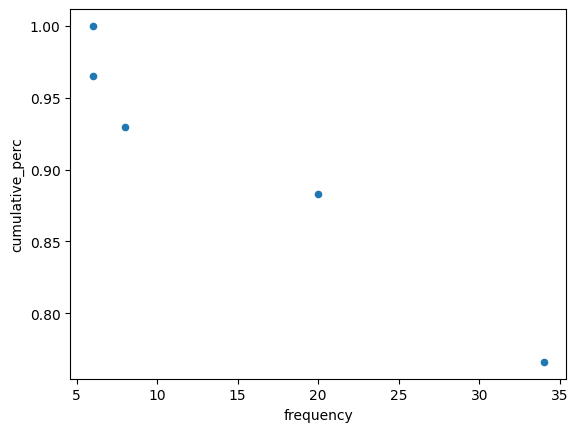

In [ ]:
#Realizamos grafico de dispersión del dataframe filtrado
filtro_index.plot("frequency", "cumulative_perc", kind="scatter")

<Axes: xlabel='250_technology_investment_operations'>

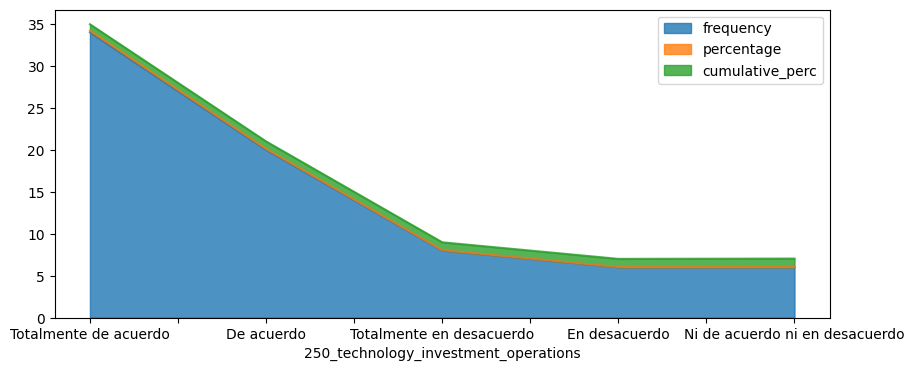

In [ ]:
#Realizamos grafico de área del dataframe filtrado
filtro_index.plot(kind='area', figsize=(10,4),alpha = 0.8)

<Axes: ylabel='frequency'>

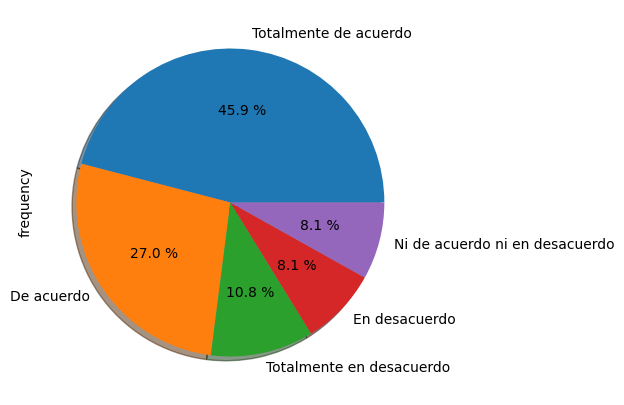

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

##**12. 249_technology_training**

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(df['249_technology_training'])
table1

249_technology_training  frequency  percentage  cumulative_perc
0                             S/D         98    0.573099         0.573099
1           Totalmente de acuerdo         37    0.216374         0.789474
2                      De acuerdo         21    0.122807         0.912281
3        Totalmente en desacuerdo          8    0.046784         0.959064
4  Ni de acuerdo ni en desacuerdo          6    0.035088         0.994152
5                   En desacuerdo          1    0.005848         1.000000

In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
filtro= table1[table1['frequency']<98]
filtro

249_technology_training  frequency  percentage  cumulative_perc
1           Totalmente de acuerdo         37    0.216374         0.789474
2                      De acuerdo         21    0.122807         0.912281
3        Totalmente en desacuerdo          8    0.046784         0.959064
4  Ni de acuerdo ni en desacuerdo          6    0.035088         0.994152
5                   En desacuerdo          1    0.005848         1.000000

In [ ]:
#Ajusto el indice de mi dataframe
filtro_index= filtro.set_index('249_technology_training')
filtro_index

frequency  percentage  cumulative_perc
249_technology_training                                               
Totalmente de acuerdo                  37    0.216374         0.789474
De acuerdo                             21    0.122807         0.912281
Totalmente en desacuerdo                8    0.046784         0.959064
Ni de acuerdo ni en desacuerdo          6    0.035088         0.994152
En desacuerdo                           1    0.005848         1.000000

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Totalmente de acuerdo'),
  Text(1, 0, 'De acuerdo'),
  Text(2, 0, 'Totalmente en desacuerdo'),
  Text(3, 0, 'Ni de acuerdo ni en desacuerdo'),
  Text(4, 0, 'En desacuerdo')])

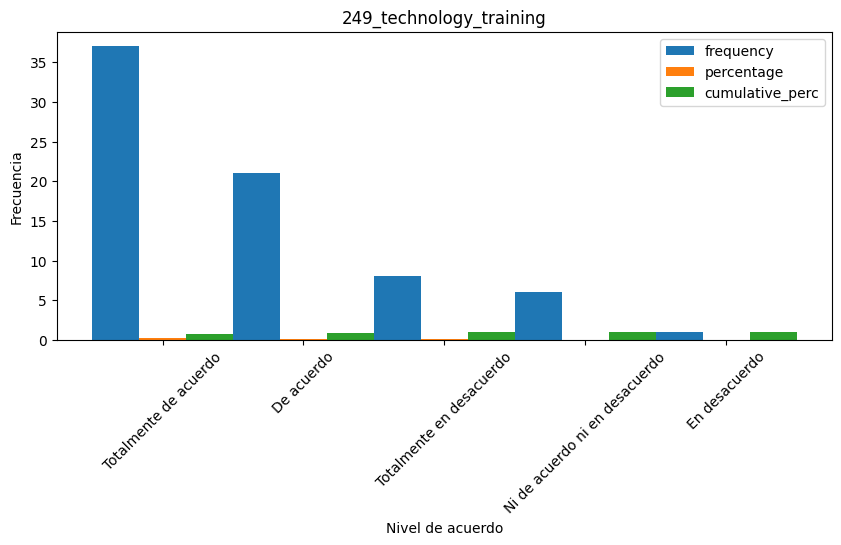

In [ ]:
# Realizamos grafico de barras del dataframe filtrado
filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('249_technology_training')
plt.xlabel('Nivel de acuerdo')
plt.ylabel('Frecuencia')
plt.xticks(rotation = 45)

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

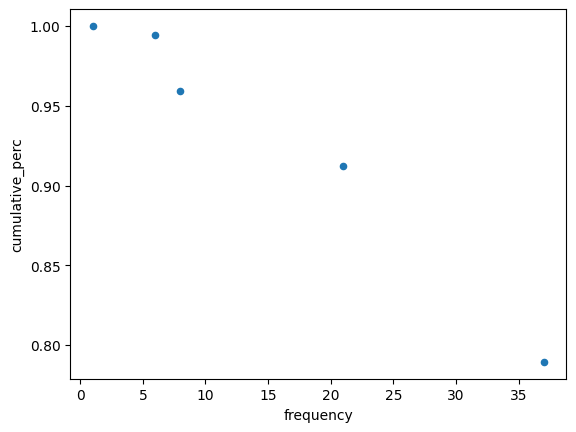

In [ ]:
#Realizamos grafico de dispersión del dataframe filtrado
filtro_index.plot("frequency", "cumulative_perc", kind="scatter")

<Axes: xlabel='249_technology_training'>

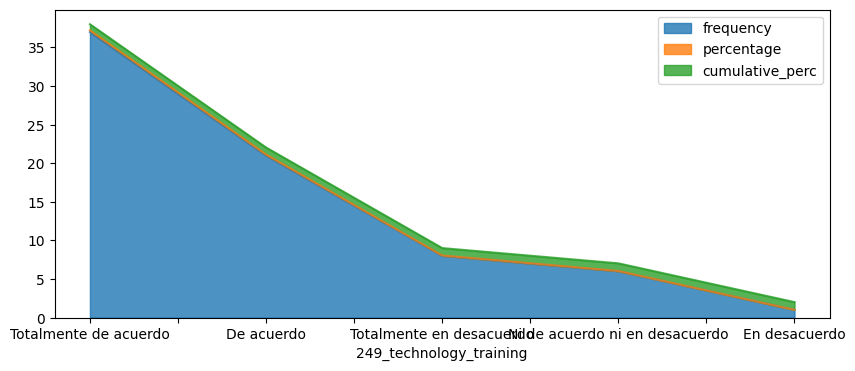

In [ ]:
#Realizamos grafico de área del dataframe filtrado
filtro_index.plot(kind='area', figsize=(10,4),alpha = 0.8)

<Axes: ylabel='frequency'>

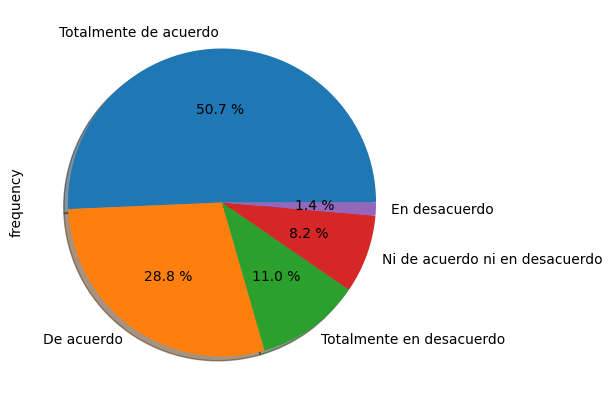

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

##**13. 162_inventory_extra_space**

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(df['162_inventory_extra_space'])
table1

162_inventory_extra_space  frequency  percentage  cumulative_perc
0                       S/D         82    0.479532         0.479532
1                         0         29    0.169591         0.649123
2                       20%         20    0.116959         0.766082
3                       10%         17    0.099415         0.865497
4                       30%         10    0.058480         0.923977
5                     50% +          9    0.052632         0.976608
6                       40%          3    0.017544         0.994152
7                        2%          1    0.005848         1.000000

In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
filtro= table1[table1['frequency']<82]
filtro

162_inventory_extra_space  frequency  percentage  cumulative_perc
1                         0         29    0.169591         0.649123
2                       20%         20    0.116959         0.766082
3                       10%         17    0.099415         0.865497
4                       30%         10    0.058480         0.923977
5                     50% +          9    0.052632         0.976608
6                       40%          3    0.017544         0.994152
7                        2%          1    0.005848         1.000000

In [ ]:
#Ajusto el indice de mi dataframe
filtro_index= filtro.set_index('162_inventory_extra_space')
filtro_index

frequency  percentage  cumulative_perc
162_inventory_extra_space                                        
0                                 29    0.169591         0.649123
20%                               20    0.116959         0.766082
10%                               17    0.099415         0.865497
30%                               10    0.058480         0.923977
50% +                              9    0.052632         0.976608
40%                                3    0.017544         0.994152
2%                                 1    0.005848         1.000000

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '20%'),
  Text(2, 0, '10%'),
  Text(3, 0, '30%'),
  Text(4, 0, '50% +'),
  Text(5, 0, '40%'),
  Text(6, 0, '2%')])

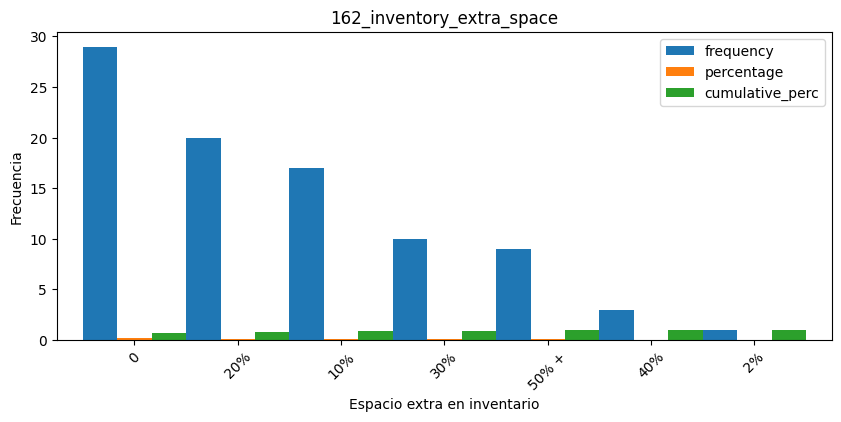

In [ ]:
# Realizamos grafico de barras del dataframe filtrado
filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('162_inventory_extra_space')
plt.xlabel('Espacio extra en inventario')
plt.ylabel('Frecuencia')
plt.xticks(rotation = 45)

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

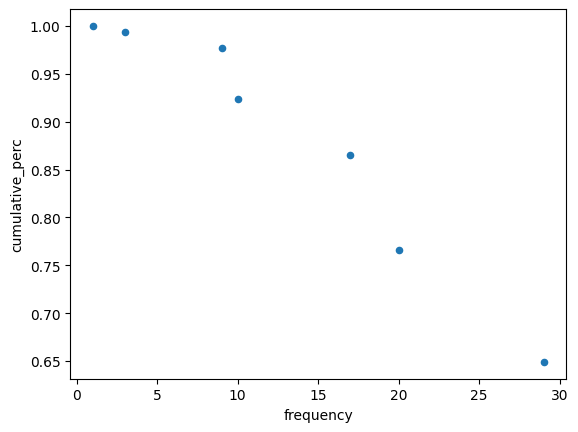

In [ ]:
#Realizamos grafico de dispersión del dataframe filtrado
filtro_index.plot("frequency", "cumulative_perc", kind="scatter")

<Axes: xlabel='162_inventory_extra_space'>

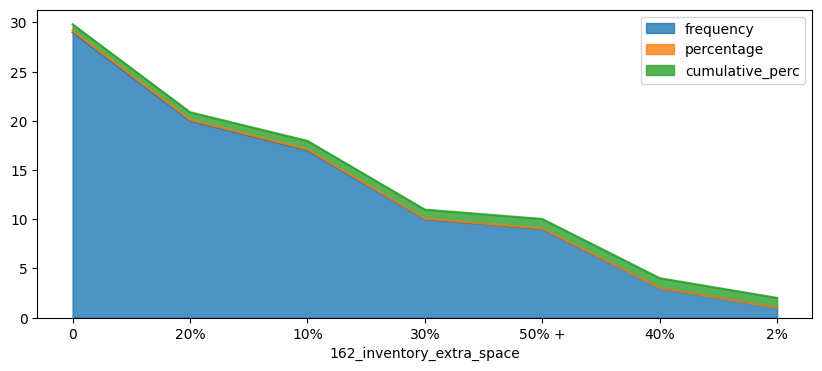

In [ ]:
#Realizamos grafico de área del dataframe filtrado
filtro_index.plot(kind='area', figsize=(10,4),alpha = 0.8)

<Axes: ylabel='frequency'>

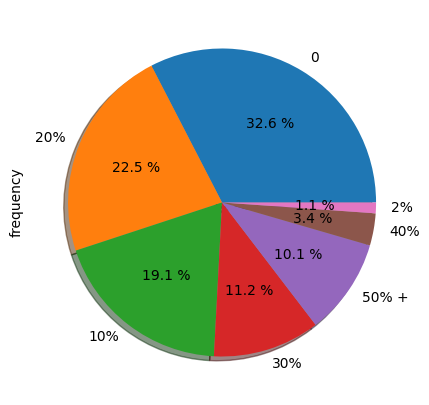

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

##**14. 161_actions_stockouts**

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(df['161_actions_stockouts'])
table1

161_actions_stockouts  frequency  percentage  \
0                                                 S/D         79    0.461988   
1   Solicitar tiempo al cliente para conseguir el ...         31    0.181287   
2                       Ofrecer un producto sustituto         20    0.116959   
3   Ofrecer un producto sustituto,Solicitar tiempo...         12    0.070175   
4                                     Perder la venta          8    0.046784   
5   Informar al proveedor,Solicitar tiempo al clie...          5    0.029240   
6                               Informar al proveedor          5    0.029240   
7   Informar al proveedor,Ofrecer un producto sust...          3    0.017544   
8   Informar al proveedor,Ofrecer un producto sust...          2    0.011696   
9               Informar al proveedor,Perder la venta          2    0.011696   
10            Descuento,Ofrecer un producto sustituto          1    0.005848   
11      Ofrecer un producto sustituto,Perder la venta          1    0.005848   
12                                            apuntar          1    0.005848   
13  Informar al proveedor,Ofrecer un producto sust...          1    0.005848   

    cumulative_perc  
0          0.461988  
1          0.643275  
2          0.760234  
3          0.830409  
4          0.877193  
5          0.906433  
6          0.935673  
7          0.953216  
8          0.964912  
9          0.976608  
10         0.982456  
11         0.988304  
12         0.994152  
13         1.000000

In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
filtro= table1[table1['frequency']<79]
filtro

161_actions_stockouts  frequency  percentage  \
1   Solicitar tiempo al cliente para conseguir el ...         31    0.181287   
2                       Ofrecer un producto sustituto         20    0.116959   
3   Ofrecer un producto sustituto,Solicitar tiempo...         12    0.070175   
4                                     Perder la venta          8    0.046784   
5   Informar al proveedor,Solicitar tiempo al clie...          5    0.029240   
6                               Informar al proveedor          5    0.029240   
7   Informar al proveedor,Ofrecer un producto sust...          3    0.017544   
8   Informar al proveedor,Ofrecer un producto sust...          2    0.011696   
9               Informar al proveedor,Perder la venta          2    0.011696   
10            Descuento,Ofrecer un producto sustituto          1    0.005848   
11      Ofrecer un producto sustituto,Perder la venta          1    0.005848   
12                                            apuntar          1    0.005848   
13  Informar al proveedor,Ofrecer un producto sust...          1    0.005848   

    cumulative_perc  
1          0.643275  
2          0.760234  
3          0.830409  
4          0.877193  
5          0.906433  
6          0.935673  
7          0.953216  
8          0.964912  
9          0.976608  
10         0.982456  
11         0.988304  
12         0.994152  
13         1.000000

In [ ]:
#Ajusto el indice de mi dataframe
filtro_index= filtro.set_index('161_actions_stockouts')
filtro_index

frequency  percentage  \
161_actions_stockouts                                                       
Solicitar tiempo al cliente para conseguir el p...         31    0.181287   
Ofrecer un producto sustituto                              20    0.116959   
Ofrecer un producto sustituto,Solicitar tiempo ...         12    0.070175   
Perder la venta                                             8    0.046784   
Informar al proveedor,Solicitar tiempo al clien...          5    0.029240   
Informar al proveedor                                       5    0.029240   
Informar al proveedor,Ofrecer un producto susti...          3    0.017544   
Informar al proveedor,Ofrecer un producto susti...          2    0.011696   
Informar al proveedor,Perder la venta                       2    0.011696   
Descuento,Ofrecer un producto sustituto                     1    0.005848   
Ofrecer un producto sustituto,Perder la venta               1    0.005848   
apuntar                                                     1    0.005848   
Informar al proveedor,Ofrecer un producto susti...          1    0.005848   

                                                    cumulative_perc  
161_actions_stockouts                                                
Solicitar tiempo al cliente para conseguir el p...         0.643275  
Ofrecer un producto sustituto                              0.760234  
Ofrecer un producto sustituto,Solicitar tiempo ...         0.830409  
Perder la venta                                            0.877193  
Informar al proveedor,Solicitar tiempo al clien...         0.906433  
Informar al proveedor                                      0.935673  
Informar al proveedor,Ofrecer un producto susti...         0.953216  
Informar al proveedor,Ofrecer un producto susti...         0.964912  
Informar al proveedor,Perder la venta                      0.976608  
Descuento,Ofrecer un producto sustituto                    0.982456  
Ofrecer un producto sustituto,Perder la venta              0.988304  
apuntar                                                    0.994152  
Informar al proveedor,Ofrecer un producto susti...         1.000000

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Solicitar tiempo al cliente para conseguir el producto'),
  Text(1, 0, 'Ofrecer un producto sustituto'),
  Text(2, 0, 'Ofrecer un producto sustituto,Solicitar tiempo al cliente para conseguir el producto'),
  Text(3, 0, 'Perder la venta'),
  Text(4, 0, 'Informar al proveedor,Solicitar tiempo al cliente para conseguir el producto'),
  Text(5, 0, 'Informar al proveedor'),
  Text(6, 0, 'Informar al proveedor,Ofrecer un producto sustituto'),
  Text(7, 0, 'Informar al proveedor,Ofrecer un producto sustituto,Solicitar tiempo al cliente para conseguir el producto'),
  Text(8, 0, 'Informar al proveedor,Perder la venta'),
  Text(9, 0, 'Descuento,Ofrecer un producto sustituto'),
  Text(10, 0, 'Ofrecer un producto sustituto,Perder la venta'),
  Text(11, 0, 'apuntar'),
  Text(12, 0, 'Informar al proveedor,Ofrecer un producto sustituto,Solicitar tiempo al cliente para conseguir el producto,pedir en otra sucursal')])

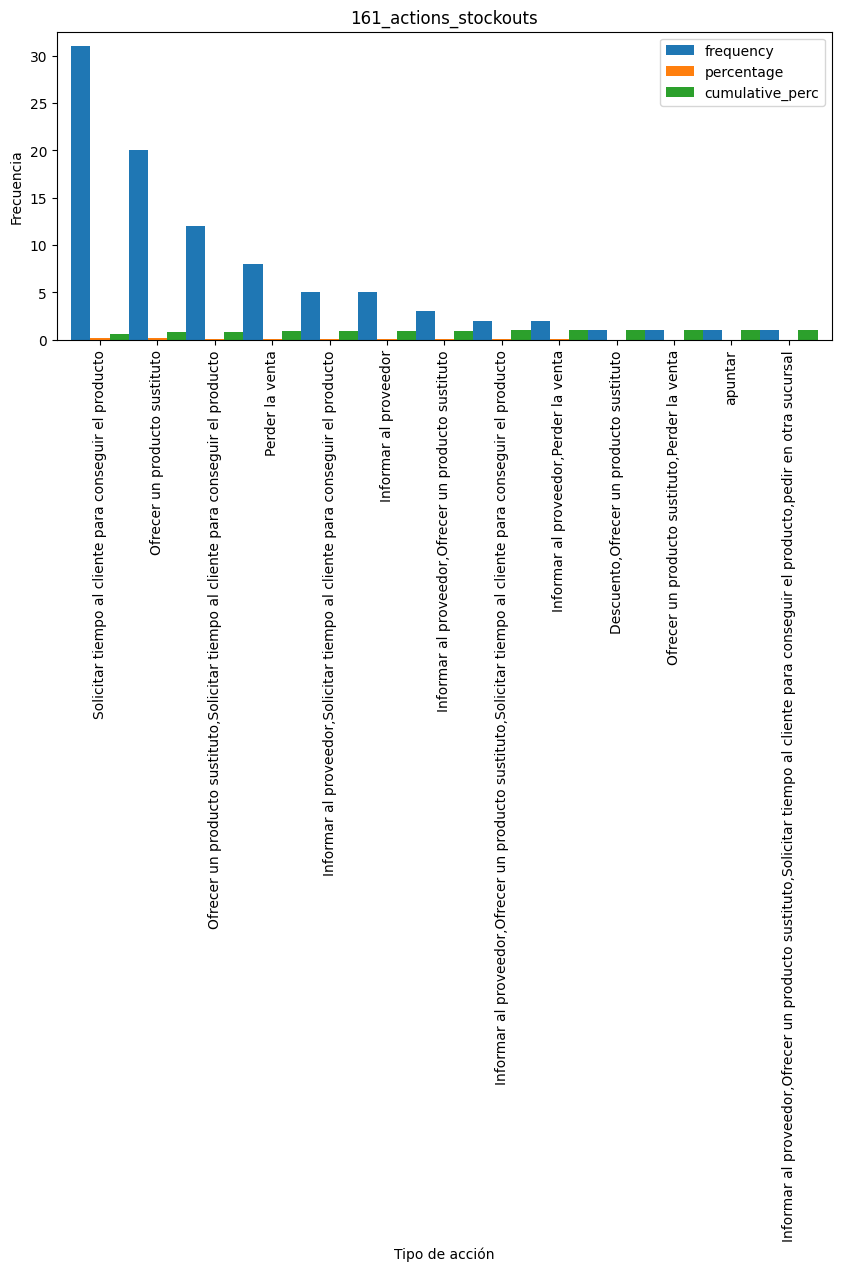

In [ ]:
# Realizamos grafico de barras del dataframe filtrado
filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('161_actions_stockouts')
plt.xlabel('Tipo de acción')
plt.ylabel('Frecuencia')
plt.xticks(rotation = 90)

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

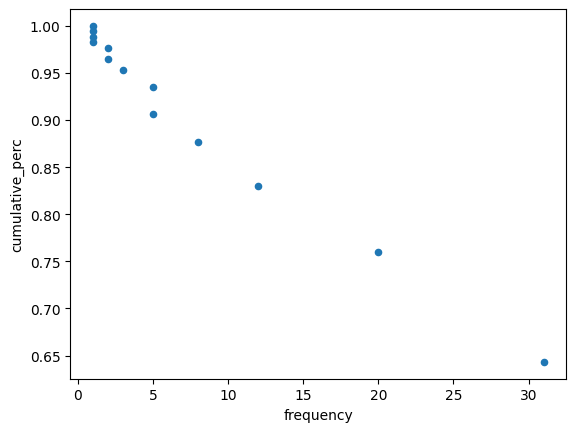

In [ ]:
#Realizamos grafico de dispersión del dataframe filtrado
filtro_index.plot("frequency", "cumulative_perc", kind="scatter")

<Axes: xlabel='161_actions_stockouts'>

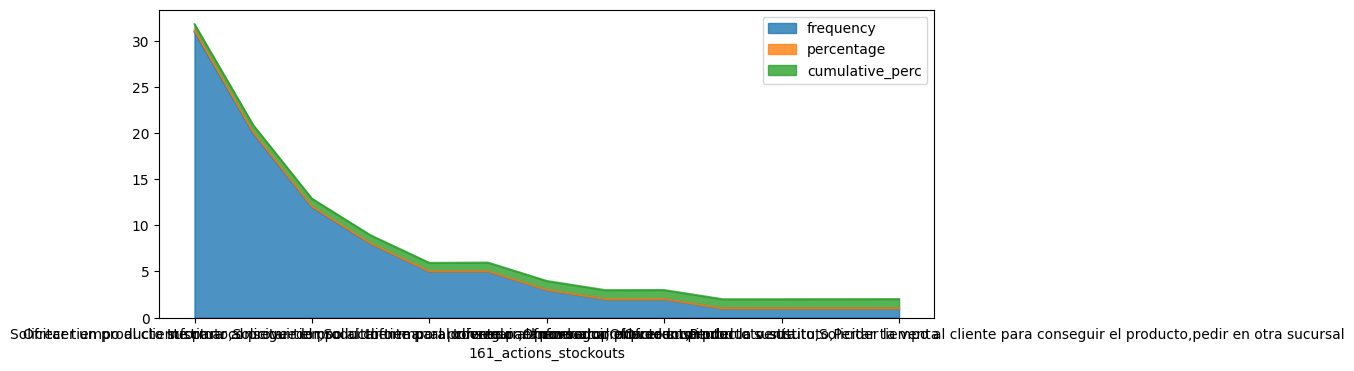

In [ ]:
#Realizamos grafico de área del dataframe filtrado
filtro_index.plot(kind='area', figsize=(10,4),alpha = 0.8)

<Axes: ylabel='frequency'>

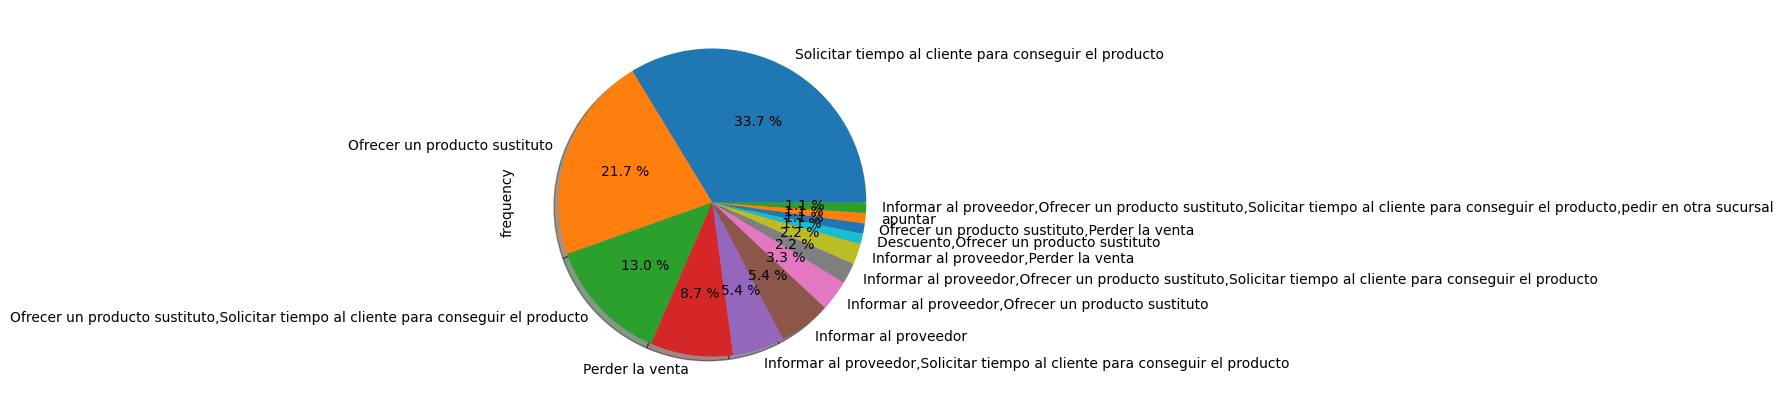

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

##**15. 158_charact_organize_products_on_shelves**

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(df['158_charact_organize_products_on_shelves'])
table1

158_charact_organize_products_on_shelves  frequency  percentage  \
0                                                 S/D         79    0.461988   
1   Categoría (e.g. limpieza, aseo personal, comes...         29    0.169591   
2                                 Frecuencia de venta         15    0.087719   
3                                              Tamaño          9    0.052632   
4                                  Margen de utilidad          8    0.046784   
5                                              Precio          6    0.035088   
6                                       Refrigeración          4    0.023392   
7                   Frecuencia de venta,Refrigeración          3    0.017544   
8   Categoría (e.g. limpieza, aseo personal, comes...          3    0.017544   
9   Categoría (e.g. limpieza, aseo personal, comes...          2    0.011696   
10                               Refrigeración,Tamaño          2    0.011696   
11  Categoría (e.g. limpieza, aseo personal, comes...          1    0.005848   
12                         Frecuencia de venta,Tamaño          1    0.005848   
13  Categoría (e.g. limpieza, aseo personal, comes...          1    0.005848   
14  Categoría (e.g. limpieza, aseo personal, comes...          1    0.005848   
15                                           Ninguna           1    0.005848   
16                Venta cruzada (e.g. cereal + leche)          1    0.005848   
17  Categoría (e.g. limpieza, aseo personal, comes...          1    0.005848   
18  Categoría (e.g. limpieza, aseo personal, comes...          1    0.005848   
19  Categoría (e.g. limpieza, aseo personal, comes...          1    0.005848   
20  Categoría (e.g. limpieza, aseo personal, comes...          1    0.005848   
21             Frecuencia de venta,Margen de utilidad          1    0.005848   

    cumulative_perc  
0          0.461988  
1          0.631579  
2          0.719298  
3          0.771930  
4          0.818713  
5          0.853801  
6          0.877193  
7          0.894737  
8          0.912281  
9          0.923977  
10         0.935673  
11         0.941520  
12         0.947368  
13         0.953216  
14         0.959064  
15         0.964912  
16         0.970760  
17         0.976608  
18         0.982456  
19         0.988304  
20         0.994152  
21         1.000000

In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
filtro= table1[table1['frequency'] < 79]
filtro = filtro[filtro['frequency'] > 2]
filtro

158_charact_organize_products_on_shelves  frequency  percentage  \
1  Categoría (e.g. limpieza, aseo personal, comes...         29    0.169591   
2                                Frecuencia de venta         15    0.087719   
3                                             Tamaño          9    0.052632   
4                                 Margen de utilidad          8    0.046784   
5                                             Precio          6    0.035088   
6                                      Refrigeración          4    0.023392   
7                  Frecuencia de venta,Refrigeración          3    0.017544   
8  Categoría (e.g. limpieza, aseo personal, comes...          3    0.017544   

   cumulative_perc  
1         0.631579  
2         0.719298  
3         0.771930  
4         0.818713  
5         0.853801  
6         0.877193  
7         0.894737  
8         0.912281

In [ ]:
#Ajusto el indice de mi dataframe
filtro_index= filtro.set_index('158_charact_organize_products_on_shelves')
filtro_index

frequency  percentage  \
158_charact_organize_products_on_shelves                                    
Categoría (e.g. limpieza, aseo personal, comest...         29    0.169591   
Frecuencia de venta                                        15    0.087719   
Tamaño                                                      9    0.052632   
Margen de utilidad                                          8    0.046784   
Precio                                                      6    0.035088   
Refrigeración                                               4    0.023392   
Frecuencia de venta,Refrigeración                           3    0.017544   
Categoría (e.g. limpieza, aseo personal, comest...          3    0.017544   

                                                    cumulative_perc  
158_charact_organize_products_on_shelves                             
Categoría (e.g. limpieza, aseo personal, comest...         0.631579  
Frecuencia de venta                                        0.719298  
Tamaño                                                     0.771930  
Margen de utilidad                                         0.818713  
Precio                                                     0.853801  
Refrigeración                                              0.877193  
Frecuencia de venta,Refrigeración                          0.894737  
Categoría (e.g. limpieza, aseo personal, comest...         0.912281

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Categoría (e.g. limpieza, aseo personal, comestibles, lácteos, etc.)'),
  Text(1, 0, 'Frecuencia de venta'),
  Text(2, 0, 'Tamaño'),
  Text(3, 0, 'Margen de utilidad'),
  Text(4, 0, 'Precio'),
  Text(5, 0, 'Refrigeración'),
  Text(6, 0, 'Frecuencia de venta,Refrigeración'),
  Text(7, 0, 'Categoría (e.g. limpieza, aseo personal, comestibles, lácteos, etc.),Refrigeración')])

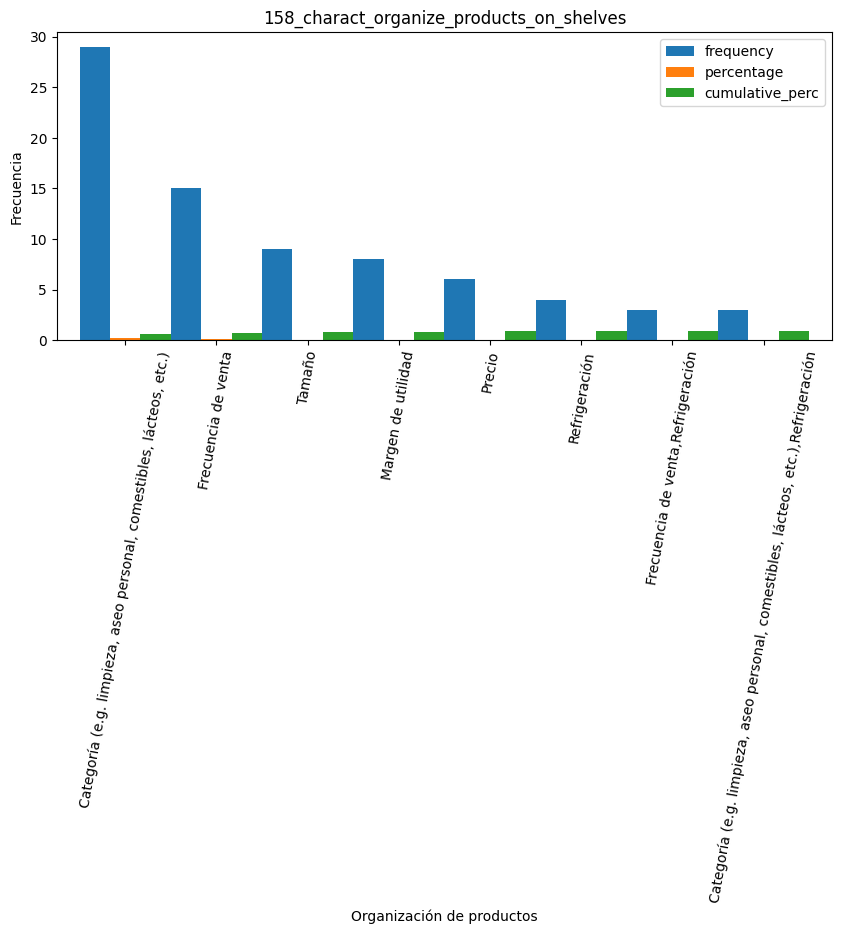

In [ ]:
# Realizamos grafico de barras del dataframe filtrado
filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('158_charact_organize_products_on_shelves')
plt.xlabel('Organización de productos')
plt.ylabel('Frecuencia')
plt.xticks(rotation = 80)

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

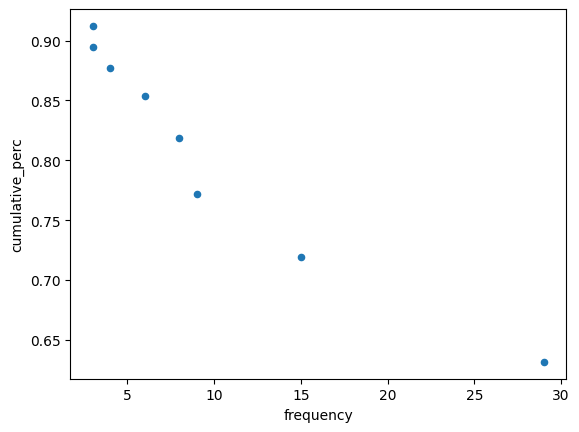

In [ ]:
#Realizamos grafico de dispersión del dataframe filtrado
filtro_index.plot("frequency", "cumulative_perc", kind="scatter")

<Axes: xlabel='158_charact_organize_products_on_shelves'>

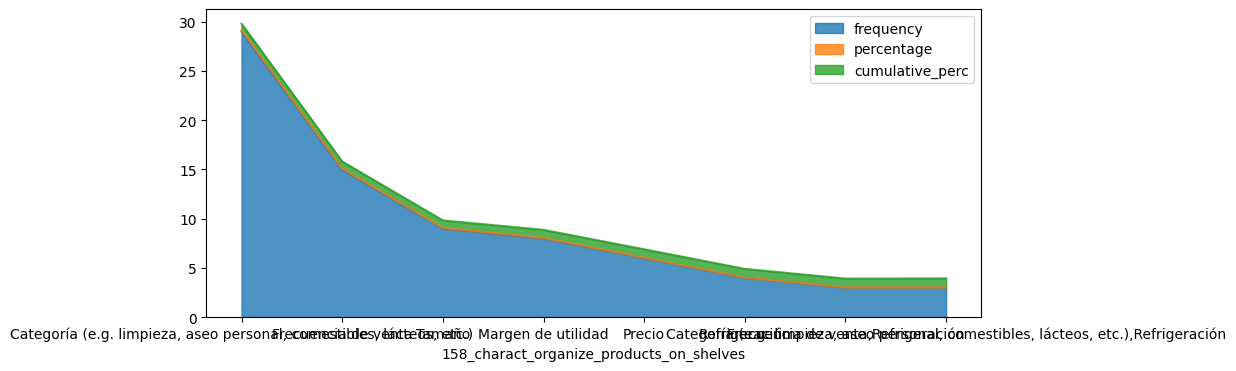

In [ ]:
#Realizamos grafico de área del dataframe filtrado
filtro_index.plot(kind='area', figsize=(10,4),alpha = 0.8)

<Axes: ylabel='frequency'>

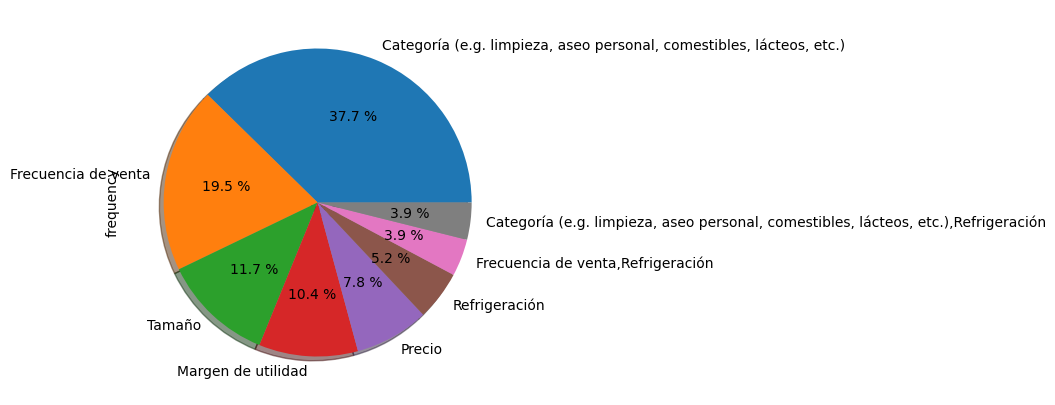

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

##**16. 157_frequency_organize_shelves**

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(df['157_frequency_organize_shelves'])
table1

157_frequency_organize_shelves  frequency  percentage  cumulative_perc
0                            S/D         75    0.438596         0.438596
1                   Semanalmente         40    0.233918         0.672515
2                    Diariamente         32    0.187135         0.859649
3                          Nunca          8    0.046784         0.906433
4                   Mensualmente          7    0.040936         0.947368
5                 Quincenalmente          5    0.029240         0.976608
6                     Anualmente          2    0.011696         0.988304
7                 Semestralmente          1    0.005848         0.994152
8                    No se tiene          1    0.005848         1.000000

In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
filtro= table1[table1['frequency']<75]
filtro

157_frequency_organize_shelves  frequency  percentage  cumulative_perc
1                   Semanalmente         40    0.233918         0.672515
2                    Diariamente         32    0.187135         0.859649
3                          Nunca          8    0.046784         0.906433
4                   Mensualmente          7    0.040936         0.947368
5                 Quincenalmente          5    0.029240         0.976608
6                     Anualmente          2    0.011696         0.988304
7                 Semestralmente          1    0.005848         0.994152
8                    No se tiene          1    0.005848         1.000000

In [ ]:
#Ajusto el indice de mi dataframe
filtro_index= filtro.set_index('157_frequency_organize_shelves')
filtro_index

frequency  percentage  cumulative_perc
157_frequency_organize_shelves                                        
Semanalmente                           40    0.233918         0.672515
Diariamente                            32    0.187135         0.859649
Nunca                                   8    0.046784         0.906433
Mensualmente                            7    0.040936         0.947368
Quincenalmente                          5    0.029240         0.976608
Anualmente                              2    0.011696         0.988304
Semestralmente                          1    0.005848         0.994152
No se tiene                             1    0.005848         1.000000

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Semanalmente'),
  Text(1, 0, 'Diariamente'),
  Text(2, 0, 'Nunca'),
  Text(3, 0, 'Mensualmente'),
  Text(4, 0, 'Quincenalmente'),
  Text(5, 0, 'Anualmente'),
  Text(6, 0, 'Semestralmente'),
  Text(7, 0, 'No se tiene')])

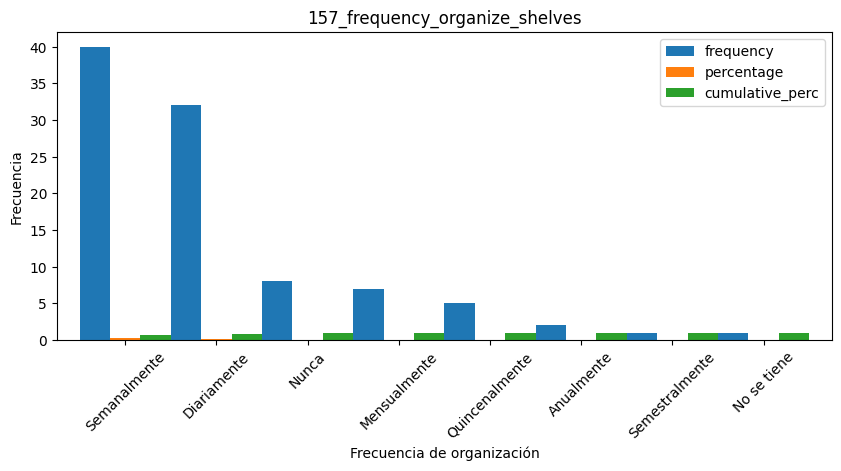

In [ ]:
# Realizamos grafico de barras del dataframe filtrado
filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('157_frequency_organize_shelves')
plt.xlabel('Frecuencia de organización')
plt.ylabel('Frecuencia')
plt.xticks(rotation = 45)

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

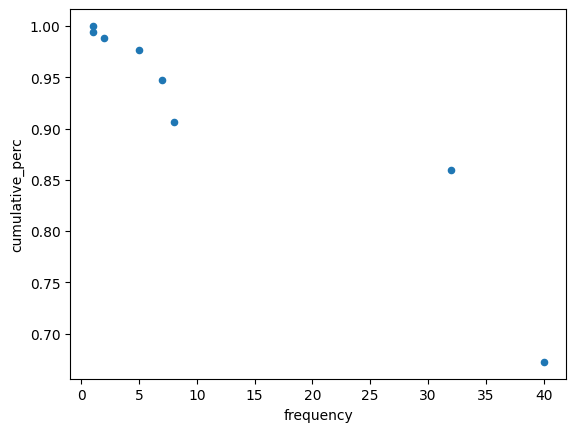

In [ ]:
#Realizamos grafico de dispersión del dataframe filtrado
filtro_index.plot("frequency", "cumulative_perc", kind="scatter")

<Axes: xlabel='157_frequency_organize_shelves'>

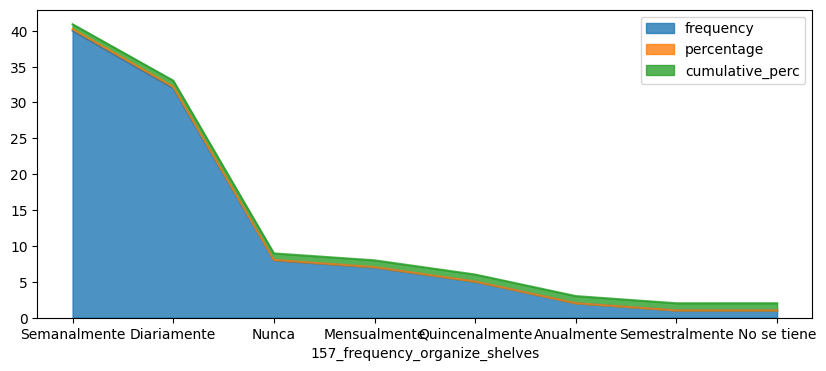

In [ ]:
#Realizamos grafico de área del dataframe filtrado
filtro_index.plot(kind='area', figsize=(10,4),alpha = 0.8)

<Axes: ylabel='frequency'>

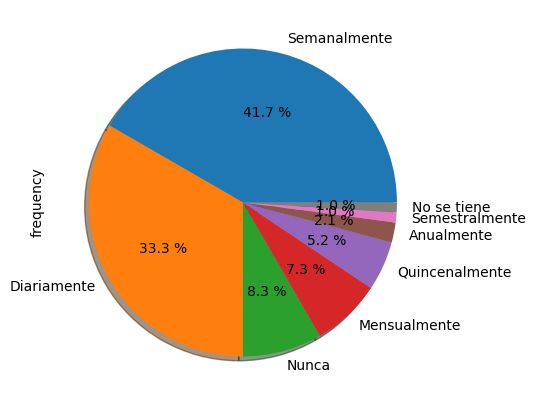

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

##**17. 279_changes_procurement_pandemic**

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(df['279_changes_procurement_pandemic'])
table1

279_changes_procurement_pandemic  frequency  percentage  \
0                                                S/D        148    0.865497   
1  Disminución de la variedad de productos,Dismin...          6    0.035088   
2  Disminuir la cantidad del pedido,Disminuir la ...          3    0.017544   
3                   Disminuir la cantidad del pedido          3    0.017544   
4                          Ninguna de las anteriores          3    0.017544   
5                 Disminuir la frecuencia de pedidos          3    0.017544   
6  Aumentar la variedad de productos.,Disminuir l...          2    0.011696   
7                 Aumentar la variedad de productos.          1    0.005848   
8  Aumentar la cantidad del pedido,Disminución de...          1    0.005848   
9                    Aumentar la cantidad del pedido          1    0.005848   

   cumulative_perc  
0         0.865497  
1         0.900585  
2         0.918129  
3         0.935673  
4         0.953216  
5         0.970760  
6         0.982456  
7         0.988304  
8         0.994152  
9         1.000000

In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
filtro= table1[table1['frequency']<148]
filtro

279_changes_procurement_pandemic  frequency  percentage  \
1  Disminución de la variedad de productos,Dismin...          6    0.035088   
2  Disminuir la cantidad del pedido,Disminuir la ...          3    0.017544   
3                   Disminuir la cantidad del pedido          3    0.017544   
4                          Ninguna de las anteriores          3    0.017544   
5                 Disminuir la frecuencia de pedidos          3    0.017544   
6  Aumentar la variedad de productos.,Disminuir l...          2    0.011696   
7                 Aumentar la variedad de productos.          1    0.005848   
8  Aumentar la cantidad del pedido,Disminución de...          1    0.005848   
9                    Aumentar la cantidad del pedido          1    0.005848   

   cumulative_perc  
1         0.900585  
2         0.918129  
3         0.935673  
4         0.953216  
5         0.970760  
6         0.982456  
7         0.988304  
8         0.994152  
9         1.000000

In [ ]:
#Ajusto el indice de mi dataframe
filtro_index= filtro.set_index('279_changes_procurement_pandemic')
filtro_index

frequency  percentage  \
279_changes_procurement_pandemic                                            
Disminución de la variedad de productos,Disminu...          6    0.035088   
Disminuir la cantidad del pedido,Disminuir la f...          3    0.017544   
Disminuir la cantidad del pedido                            3    0.017544   
Ninguna de las anteriores                                   3    0.017544   
Disminuir la frecuencia de pedidos                          3    0.017544   
Aumentar la variedad de productos.,Disminuir la...          2    0.011696   
Aumentar la variedad de productos.                          1    0.005848   
Aumentar la cantidad del pedido,Disminución de ...          1    0.005848   
Aumentar la cantidad del pedido                             1    0.005848   

                                                    cumulative_perc  
279_changes_procurement_pandemic                                     
Disminución de la variedad de productos,Disminu...         0.900585  
Disminuir la cantidad del pedido,Disminuir la f...         0.918129  
Disminuir la cantidad del pedido                           0.935673  
Ninguna de las anteriores                                  0.953216  
Disminuir la frecuencia de pedidos                         0.970760  
Aumentar la variedad de productos.,Disminuir la...         0.982456  
Aumentar la variedad de productos.                         0.988304  
Aumentar la cantidad del pedido,Disminución de ...         0.994152  
Aumentar la cantidad del pedido                            1.000000

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Disminución de la variedad de productos,Disminuir la cantidad del pedido,Disminuir la frecuencia de pedidos'),
  Text(1, 0, 'Disminuir la cantidad del pedido,Disminuir la frecuencia de pedidos'),
  Text(2, 0, 'Disminuir la cantidad del pedido'),
  Text(3, 0, 'Ninguna de las anteriores'),
  Text(4, 0, 'Disminuir la frecuencia de pedidos'),
  Text(5, 0, 'Aumentar la variedad de productos.,Disminuir la cantidad del pedido,Disminuir la frecuencia de pedidos'),
  Text(6, 0, 'Aumentar la variedad de productos.'),
  Text(7, 0, 'Aumentar la cantidad del pedido,Disminución de la variedad de productos,Disminuir la cantidad del pedido,Disminuir la frecuencia de pedidos'),
  Text(8, 0, 'Aumentar la cantidad del pedido')])

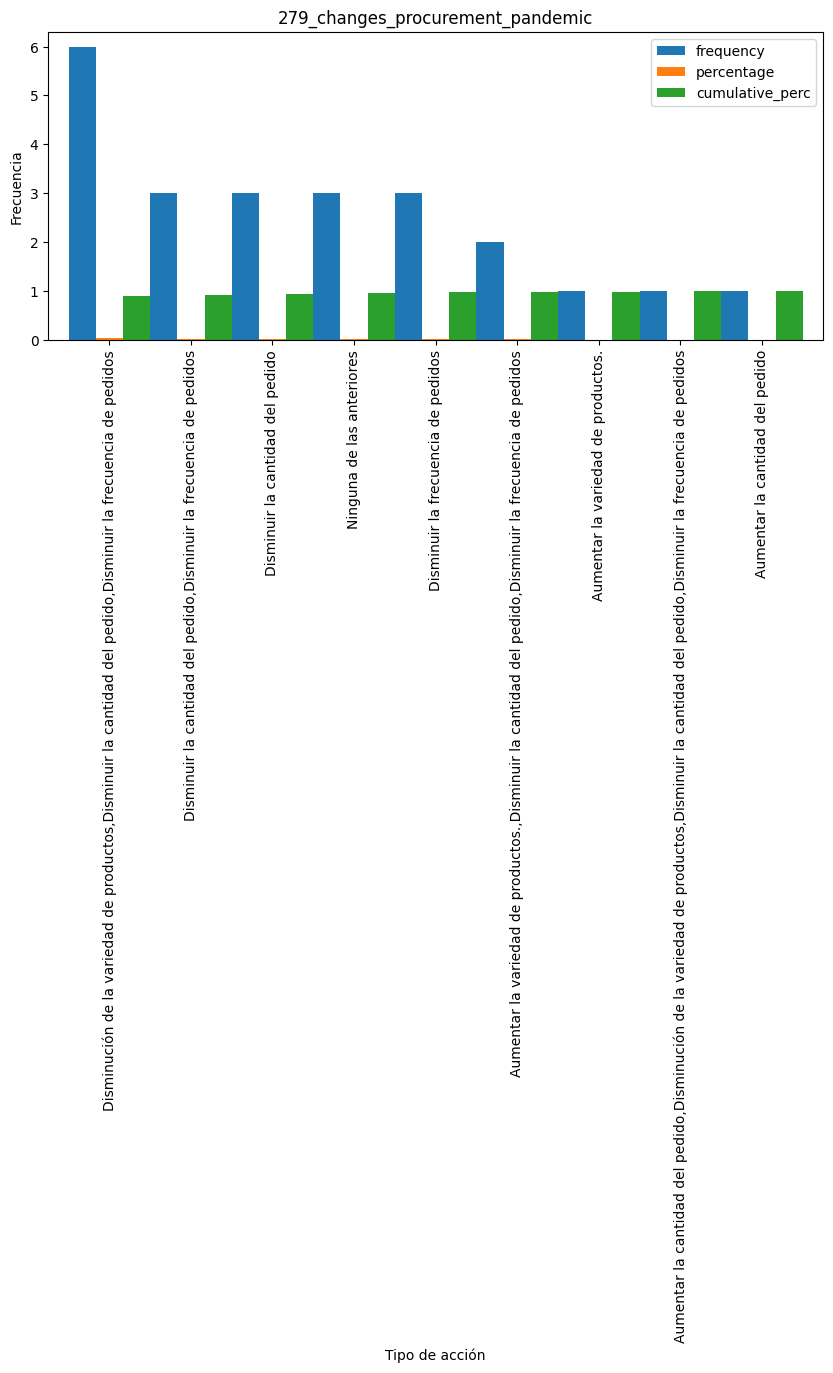

In [ ]:
# Realizamos grafico de barras del dataframe filtrado
filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('279_changes_procurement_pandemic')
plt.xlabel('Tipo de acción')
plt.ylabel('Frecuencia')
plt.xticks(rotation = 90)

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

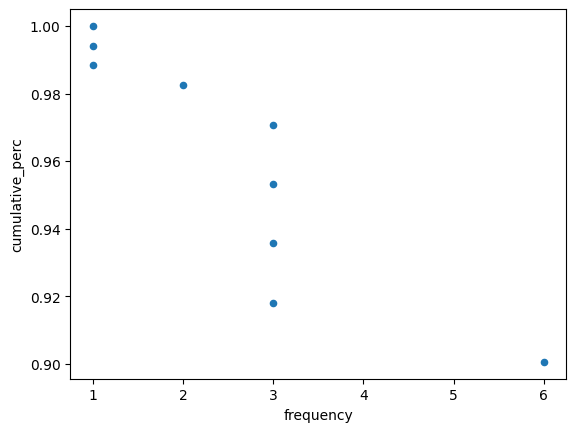

In [ ]:
#Realizamos grafico de dispersión del dataframe filtrado
filtro_index.plot("frequency", "cumulative_perc", kind="scatter")

<Axes: xlabel='279_changes_procurement_pandemic'>

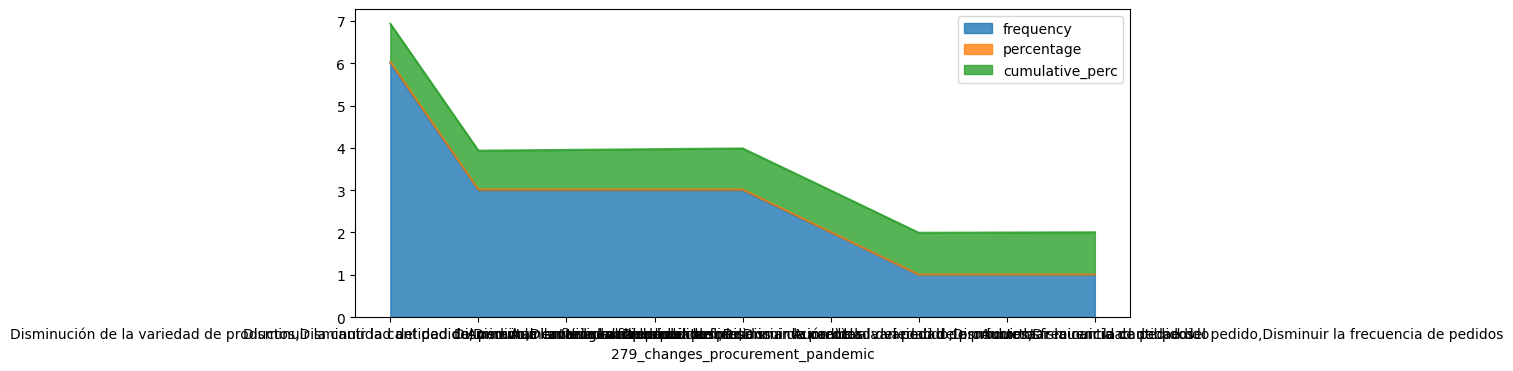

In [ ]:
#Realizamos grafico de área del dataframe filtrado
filtro_index.plot(kind='area', figsize=(10,4),alpha = 0.8)

<Axes: ylabel='frequency'>

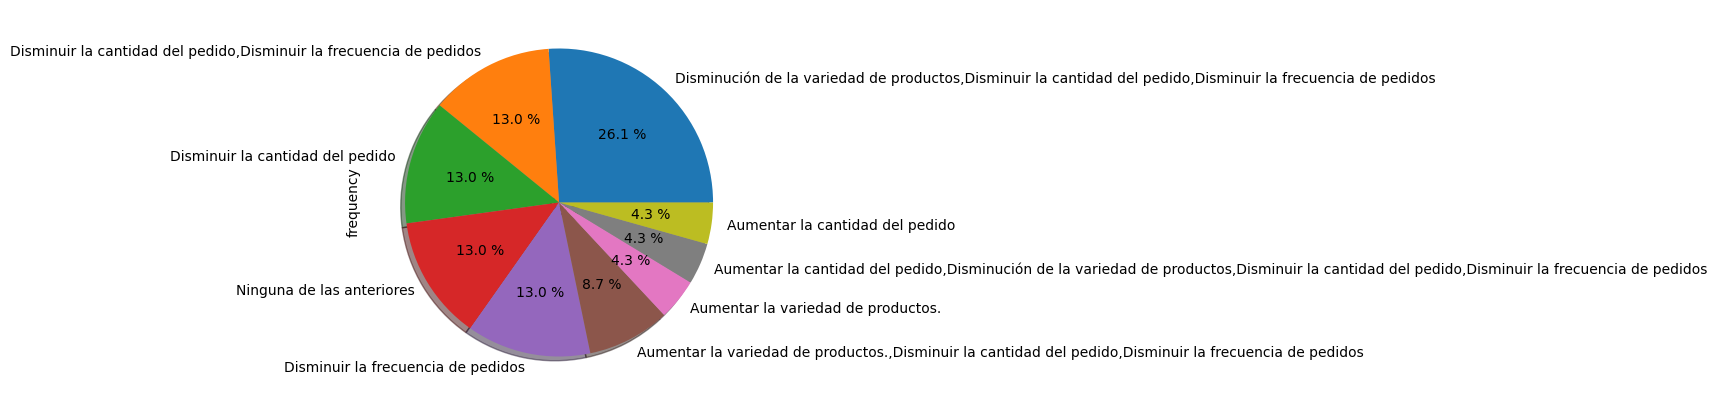

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

##**18. 56_procurement_changes_pandemic**

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(df['56_procurement_changes_pandemic'])
table1

56_procurement_changes_pandemic  frequency  percentage  cumulative_perc
0                             S/D         90    0.526316         0.526316
1                              no         55    0.321637         0.847953
2                             yes         26    0.152047         1.000000

In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
filtro= table1[table1['frequency']<90]
filtro

56_procurement_changes_pandemic  frequency  percentage  cumulative_perc
1                              no         55    0.321637         0.847953
2                             yes         26    0.152047         1.000000

In [ ]:
#Ajusto el indice de mi dataframe
filtro_index= filtro.set_index('56_procurement_changes_pandemic')
filtro_index

frequency  percentage  cumulative_perc
56_procurement_changes_pandemic                                        
no                                      55    0.321637         0.847953
yes                                     26    0.152047         1.000000

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

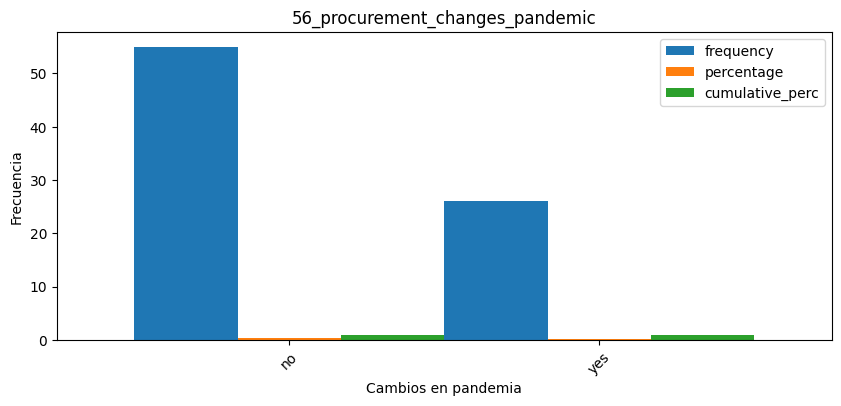

In [ ]:
# Realizamos grafico de barras del dataframe filtrado
filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('56_procurement_changes_pandemic')
plt.xlabel('Cambios en pandemia')
plt.ylabel('Frecuencia')
plt.xticks(rotation = 45)

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

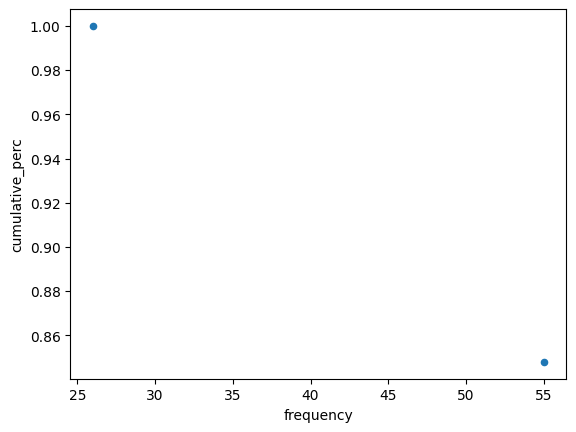

In [ ]:
#Realizamos grafico de dispersión del dataframe filtrado
filtro_index.plot("frequency", "cumulative_perc", kind="scatter")

<Axes: xlabel='56_procurement_changes_pandemic'>

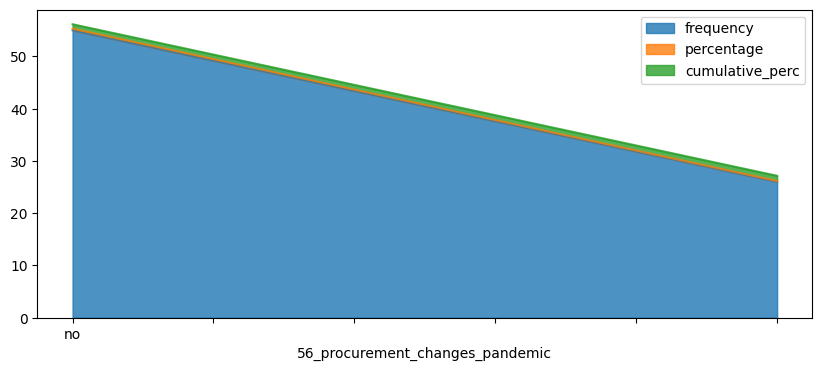

In [ ]:
#Realizamos grafico de área del dataframe filtrado
filtro_index.plot(kind='area', figsize=(10,4),alpha = 0.8)

<Axes: ylabel='frequency'>

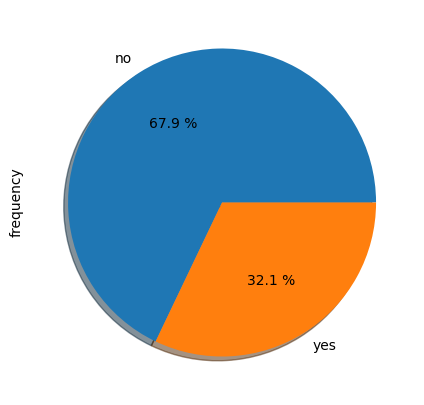

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

##**19. 277_payment_method_suppliers**

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(df['277_payment_method_suppliers'])
table1

277_payment_method_suppliers  frequency  percentage  \
0                                                S/D        103    0.602339   
1                                           Efectivo         43    0.251462   
2               Efectivo,Transferencia interbancaria          8    0.046784   
3                        Transferencia interbancaria          7    0.040936   
4             Efectivo,Tarjeta de débito y/o crédito          4    0.023392   
5                      Tarjeta de débito y/o crédito          4    0.023392   
6  Efectivo,Tarjeta de débito y/o crédito,Transfe...          2    0.011696   

   cumulative_perc  
0         0.602339  
1         0.853801  
2         0.900585  
3         0.941520  
4         0.964912  
5         0.988304  
6         1.000000

In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
filtro= table1[table1['frequency']<103]
filtro

277_payment_method_suppliers  frequency  percentage  \
1                                           Efectivo         43    0.251462   
2               Efectivo,Transferencia interbancaria          8    0.046784   
3                        Transferencia interbancaria          7    0.040936   
4             Efectivo,Tarjeta de débito y/o crédito          4    0.023392   
5                      Tarjeta de débito y/o crédito          4    0.023392   
6  Efectivo,Tarjeta de débito y/o crédito,Transfe...          2    0.011696   

   cumulative_perc  
1         0.853801  
2         0.900585  
3         0.941520  
4         0.964912  
5         0.988304  
6         1.000000

In [ ]:
#Ajusto el indice de mi dataframe
filtro_index= filtro.set_index('277_payment_method_suppliers')
filtro_index

frequency  percentage  \
277_payment_method_suppliers                                                
Efectivo                                                   43    0.251462   
Efectivo,Transferencia interbancaria                        8    0.046784   
Transferencia interbancaria                                 7    0.040936   
Efectivo,Tarjeta de débito y/o crédito                      4    0.023392   
Tarjeta de débito y/o crédito                               4    0.023392   
Efectivo,Tarjeta de débito y/o crédito,Transfer...          2    0.011696   

                                                    cumulative_perc  
277_payment_method_suppliers                                         
Efectivo                                                   0.853801  
Efectivo,Transferencia interbancaria                       0.900585  
Transferencia interbancaria                                0.941520  
Efectivo,Tarjeta de débito y/o crédito                     0.964912  
Tarjeta de débito y/o crédito                              0.988304  
Efectivo,Tarjeta de débito y/o crédito,Transfer...         1.000000

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Efectivo'),
  Text(1, 0, 'Efectivo,Transferencia interbancaria'),
  Text(2, 0, 'Transferencia interbancaria'),
  Text(3, 0, 'Efectivo,Tarjeta de débito y/o crédito'),
  Text(4, 0, 'Tarjeta de débito y/o crédito'),
  Text(5, 0, 'Efectivo,Tarjeta de débito y/o crédito,Transferencia interbancaria')])

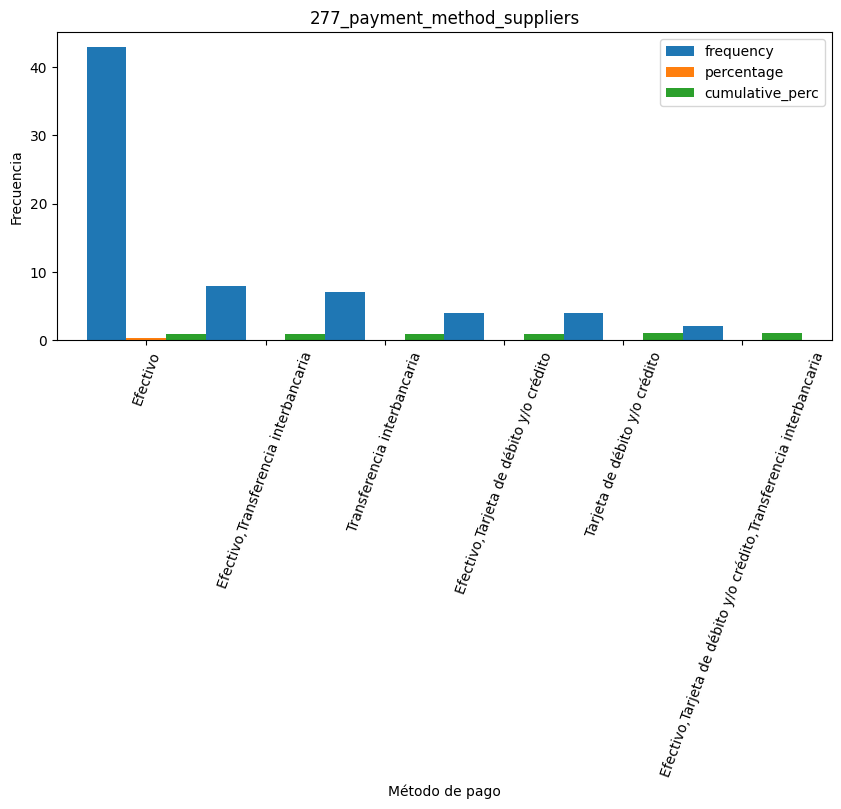

In [ ]:
# Realizamos grafico de barras del dataframe filtrado
filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('277_payment_method_suppliers')
plt.xlabel('Método de pago')
plt.ylabel('Frecuencia')
plt.xticks(rotation = 70)

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

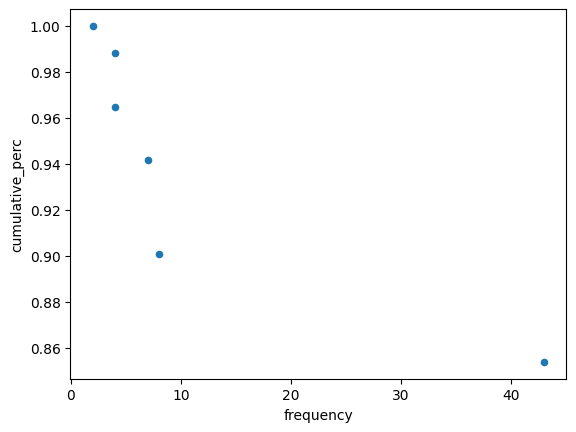

In [ ]:
#Realizamos grafico de dispersión del dataframe filtrado
filtro_index.plot("frequency", "cumulative_perc", kind="scatter")

<Axes: xlabel='277_payment_method_suppliers'>

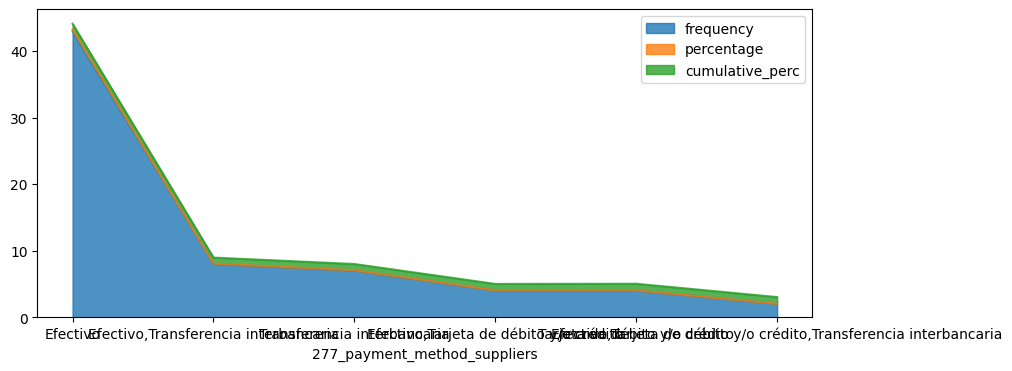

In [ ]:
#Realizamos grafico de área del dataframe filtrado
filtro_index.plot(kind='area', figsize=(10,4),alpha = 0.8)

<Axes: ylabel='frequency'>

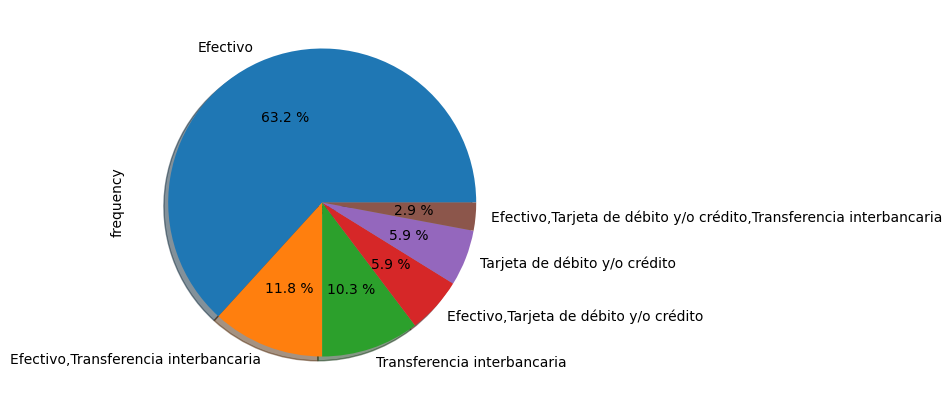

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

##**20. 192_procurement_planning_tools**

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(df['192_procurement_planning_tools'])
table1

192_procurement_planning_tools  frequency  percentage  \
0                                     S/D        103    0.602339   
1                                Cuaderno         25    0.146199   
2                                 Ninguna         24    0.140351   
3                                   Excel          6    0.035088   
4                  Software especializado          4    0.023392   
5               Aplicación móvil,Cuaderno          2    0.011696   
6                          Cuaderno,Excel          2    0.011696   
7                        Aplicación móvil          1    0.005848   
8                             Mentalmente          1    0.005848   
9   Cuaderno,Excel,Software especializado          1    0.005848   
10                              catálogo           1    0.005848   
11                         Compra directa          1    0.005848   

    cumulative_perc  
0          0.602339  
1          0.748538  
2          0.888889  
3          0.923977  
4          0.947368  
5          0.959064  
6          0.970760  
7          0.976608  
8          0.982456  
9          0.988304  
10         0.994152  
11         1.000000

In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
filtro= table1[table1['frequency']<103]
filtro

192_procurement_planning_tools  frequency  percentage  \
1                                Cuaderno         25    0.146199   
2                                 Ninguna         24    0.140351   
3                                   Excel          6    0.035088   
4                  Software especializado          4    0.023392   
5               Aplicación móvil,Cuaderno          2    0.011696   
6                          Cuaderno,Excel          2    0.011696   
7                        Aplicación móvil          1    0.005848   
8                             Mentalmente          1    0.005848   
9   Cuaderno,Excel,Software especializado          1    0.005848   
10                              catálogo           1    0.005848   
11                         Compra directa          1    0.005848   

    cumulative_perc  
1          0.748538  
2          0.888889  
3          0.923977  
4          0.947368  
5          0.959064  
6          0.970760  
7          0.976608  
8          0.982456  
9          0.988304  
10         0.994152  
11         1.000000

In [ ]:
#Ajusto el indice de mi dataframe
filtro_index= filtro.set_index('192_procurement_planning_tools')
filtro_index

frequency  percentage  cumulative_perc
192_procurement_planning_tools                                               
Cuaderno                                      25    0.146199         0.748538
Ninguna                                       24    0.140351         0.888889
Excel                                          6    0.035088         0.923977
Software especializado                         4    0.023392         0.947368
Aplicación móvil,Cuaderno                      2    0.011696         0.959064
Cuaderno,Excel                                 2    0.011696         0.970760
Aplicación móvil                               1    0.005848         0.976608
Mentalmente                                    1    0.005848         0.982456
Cuaderno,Excel,Software especializado          1    0.005848         0.988304
catálogo                                       1    0.005848         0.994152
Compra directa                                 1    0.005848         1.000000

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Cuaderno'),
  Text(1, 0, 'Ninguna'),
  Text(2, 0, 'Excel'),
  Text(3, 0, 'Software especializado'),
  Text(4, 0, 'Aplicación móvil,Cuaderno'),
  Text(5, 0, 'Cuaderno,Excel'),
  Text(6, 0, 'Aplicación móvil'),
  Text(7, 0, 'Mentalmente'),
  Text(8, 0, 'Cuaderno,Excel,Software especializado'),
  Text(9, 0, 'catálogo '),
  Text(10, 0, 'Compra directa')])

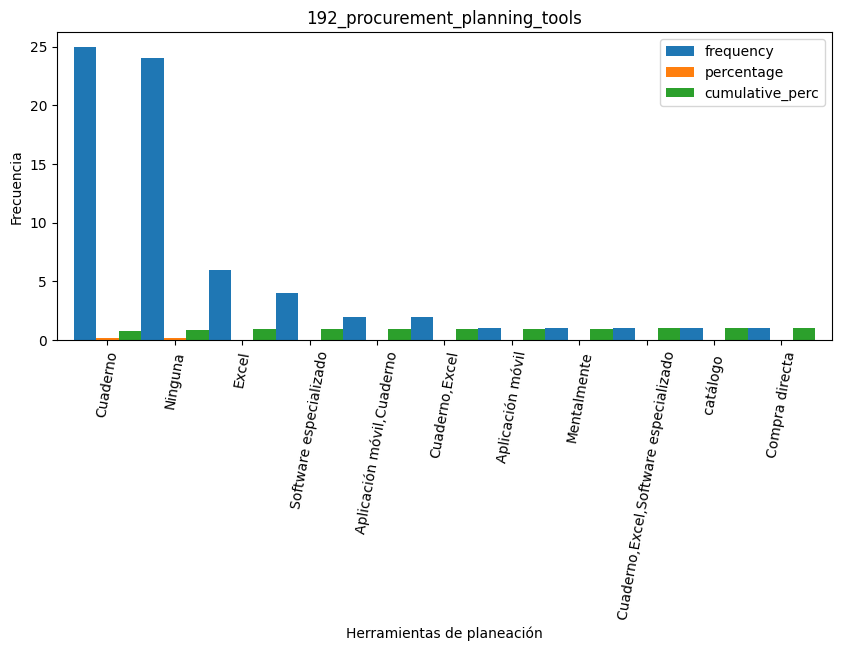

In [ ]:
# Realizamos grafico de barras del dataframe filtrado
filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('192_procurement_planning_tools')
plt.xlabel('Herramientas de planeación')
plt.ylabel('Frecuencia')
plt.xticks(rotation = 80)

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

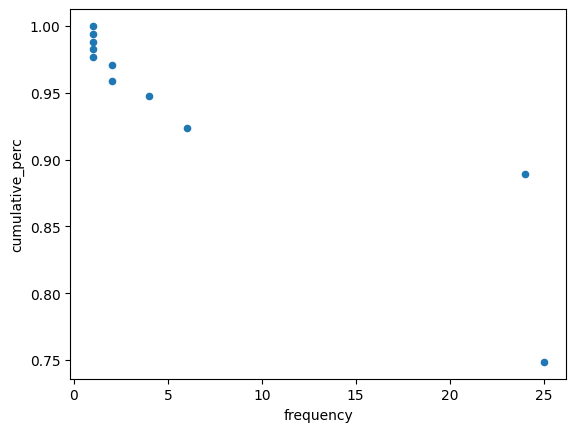

In [ ]:
#Realizamos grafico de dispersión del dataframe filtrado
filtro_index.plot("frequency", "cumulative_perc", kind="scatter")

<Axes: xlabel='192_procurement_planning_tools'>

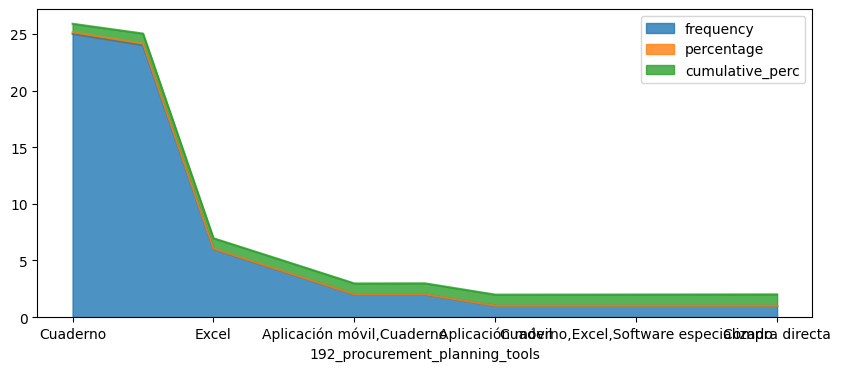

In [ ]:
#Realizamos grafico de área del dataframe filtrado
filtro_index.plot(kind='area', figsize=(10,4),alpha = 0.8)

<Axes: ylabel='frequency'>

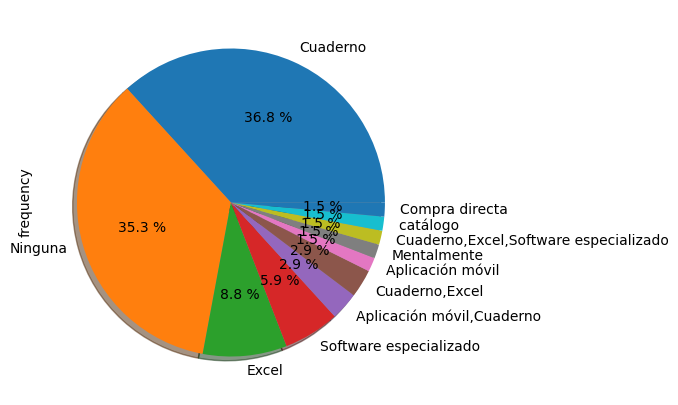

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")